# Exploratory Data Analysis - Thibaut Courtois

## Import Libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Stats & Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading DataFrame

In [ ]:
# Loading DataFrame 
df = pd.read_csv('/work/courtois-clean.csv')
df

,match,competition,date,position,minutes_played,conceded_goals,xCG,shots_against,saves,saves_with_reflexes,...,long_passes_accurate,LPA_percent,short_passes,short_passes_accurate,SPA_percent,goal_kicks,short_goal_kicks,SGK_percent,long_goal_kicks,LGK_percent
0,Manchester City - Real Madrid 4:0,Europe. UEFA Champions League,5/17/23,GK,94,4,3.88,9,5,3,...,7,50,18,18,100,6,4,67,2,33
1,Real Madrid - Manchester City 1:1,Europe. UEFA Champions League,5/9/23,GK,96,1,0.72,6,5,2,...,6,50,14,14,100,6,2,33,4,67
2,Chelsea - Real Madrid 0:2,Europe. UEFA Champions League,4/18/23,GK,95,0,1.03,6,6,4,...,2,67,19,19,100,4,0,0,4,100
3,Real Madrid - Chelsea 2:0,Europe. UEFA Champions League,4/12/23,GK,95,0,0.97,3,3,3,...,4,100,10,10,100,4,3,75,1,25
4,Real Madrid - Liverpool 1:0,Europe. UEFA Champions League,3/15/23,GK,96,0,0.74,5,5,4,...,3,21,19,19,100,4,2,50,2,50
5,Liverpool - Real Madrid 2:5,Europe. UEFA Champions League,2/21/23,GK,96,2,1.56,4,2,1,...,7,50,11,11,100,9,4,44,5,56
6,Real Madrid - Celtic 5:1,Europe. UEFA Champions League,11/2/22,GK,91,1,1.44,8,7,3,...,2,40,31,30,97,2,2,100,0,0
7,RB Leipzig - Real Madrid 3:2,Europe. UEFA Champions League,10/25/22,GK,94,3,2.91,6,3,2,...,2,100,15,15,100,8,3,38,5,63
8,Real Madrid - RB Leipzig 2:0,Europe. UEFA Champions League,9/14/22,GK,94,0,0.69,3,3,3,...,1,33,21,21,100,8,5,63,3,38
9,Celtic - Real Madrid 0:3,Europe. UEFA Champions League,9/6/22,GK,93,0,1.00,4,4,3,...,6,67,33,32,97,6,4,67,2,33


In [ ]:
# DataFrame General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match                  29 non-null     object 
 1   competition            29 non-null     object 
 2   date                   29 non-null     object 
 3   position               29 non-null     object 
 4   minutes_played         29 non-null     int64  
 5   conceded_goals         29 non-null     int64  
 6   xCG                    29 non-null     float64
 7   shots_against          29 non-null     int64  
 8   saves                  29 non-null     int64  
 9   saves_with_reflexes    29 non-null     int64  
 10  SWR_percent            29 non-null     int64  
 11  exits                  29 non-null     int64  
 12  long_passes            29 non-null     int64  
 13  long_passes_accurate   29 non-null     int64  
 14  LPA_percent            29 non-null     int64  
 15  short_pa

In [ ]:
# Row & Columns 
print(df.shape)

(29, 23)


In [ ]:
# Looking for null or missing values
df.isnull().sum()

match                    0
competition              0
date                     0
position                 0
minutes_played           0
conceded_goals           0
xCG                      0
shots_against            0
saves                    0
saves_with_reflexes      0
SWR_percent              0
exits                    0
long_passes              0
long_passes_accurate     0
LPA_percent              0
short_passes             0
short_passes_accurate    0
SPA_percent              0
goal_kicks               0
short_goal_kicks         0
SGK_percent              0
long_goal_kicks          0
LGK_percent              0
dtype: int64

In [ ]:
df.describe()

,minutes_played,conceded_goals,xCG,shots_against,saves,saves_with_reflexes,SWR_percent,exits,long_passes,long_passes_accurate,LPA_percent,short_passes,short_passes_accurate,SPA_percent,goal_kicks,short_goal_kicks,SGK_percent,long_goal_kicks,LGK_percent
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,97.413793,1.034483,1.520345,5.137931,4.103448,2.482759,56.517241,1.448276,8.241379,4.344828,52.931034,20.241379,20.000000,99.068966,5.862069,2.482759,45.689655,3.379310,50.931034
std,9.500065,1.209568,0.945608,2.416079,2.304419,1.703372,32.545156,1.120784,5.402745,3.265358,21.828767,7.808673,7.578164,1.751143,3.409275,1.805165,28.297026,3.016784,28.619338
min,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.000000,0.000000,0.740000,4.000000,3.000000,1.000000,40.000000,0.000000,4.000000,2.000000,42.000000,15.000000,15.000000,100.000000,3.000000,1.000000,27.000000,1.000000,33.000000
50%,95.000000,1.000000,1.360000,5.000000,4.000000,2.000000,60.000000,2.000000,8.000000,4.000000,50.000000,20.000000,19.000000,100.000000,6.000000,2.000000,44.000000,2.000000,50.000000
75%,96.000000,1.000000,2.030000,6.000000,5.000000,4.000000,78.000000,2.000000,13.000000,6.000000,57.000000,26.000000,26.000000,100.000000,8.000000,3.000000,67.000000,5.000000,71.000000
max,134.000000,4.000000,3.880000,10.000000,9.000000,7.000000,100.000000,3.000000,20.000000,13.000000,100.000000,36.000000,35.000000,100.000000,16.000000,8.000000,100.000000,13.000000,100.000000


## Clean Sheet Preliminaries

A clean sheet in football denotes a match where a goalkeeper, supported by the cohesive efforts of the team's defense, successfully negates all goal-scoring attempts by the opposition. It stands as an accomplishment of defensive fortitude and strategic solidity, embodied in a game devoid of any concessions.

For a high-profile team like Real Madrid, achieving consistent clean sheets has far-reaching impacts. Primarily, it signifies the effectiveness of their defensive strategies and the performance of their goalkeeper. Given the competitive nature of elite leagues, maintaining a high clean sheet ratio is often indicative of a team's title ambitions. Notably, it enhances team confidence, reduces pressure on the attacking line, and serves as a psychological edge over opponents.

From a data science perspective, clean sheets offer a valuable metric for evaluating team and individual performances. Analyzing clean sheet data can reveal insights into the defensive prowess of a team, the effectiveness of their tactical systems, and the impact of individual players, particularly the goalkeeper. Correlating clean sheets with match outcomes can inform predictive models for future performances and guide decision-making for team management. 

For instance, a low frequency of clean sheets could indicate potential weaknesses in the defensive line that need to be addressed, or it might reveal a dependency on high-scoring matches to secure victories, a risky strategy for long-term success. On the other hand, a high frequency of clean sheets could reflect a strong defensive unit and an effective tactical system, which provide a solid foundation for the team's success. 

Thus, clean sheets, while a simple concept, offer a profound depth of understanding of a team's defensive capabilities and are a critical factor in evaluating the balance and success of a team.

## Position Relevancy

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

GK    29
Name: position, dtype: int64
GK    29
Name: position, dtype: int64
29.0


Real Madrid's Primary Custodian

"GK" stands for "Goalkeeper", a unique and vital position in the realm of football. Occupying the final line of defense, the goalkeeper's main duty is to prevent the opposition from scoring by stopping any shots aimed at the net. This role demands exceptional reflexes, composure under pressure, and the ability to read the game effectively to anticipate and intercept attacks.

In the case of Thibaut Courtois, his stature and agility make him a formidable presence in goal. Known for his shot-stopping abilities, he excels in one-on-one situations, often making crucial saves that turn the tide of games. His distribution skills also enable him to initiate counter-attacks quickly, adding another dimension to Real Madrid's offensive arsenal. 

Moreover, his leadership and communication skills fortify Real Madrid's defense. As the player with the whole pitch in his view, Courtois effectively organizes the defensive line and alerts his teammates to impending threats, thereby playing a crucial role in maintaining the team's defensive solidity. 

Courtois's performances as the "GK" have a profound impact on the fortunes of Real Madrid, underlining the critical nature of this position in football. His ability to perform consistently in this role has earned him recognition as one of the world's best goalkeepers, cementing his place in the illustrious lineage of Real Madrid's custodians of the net.

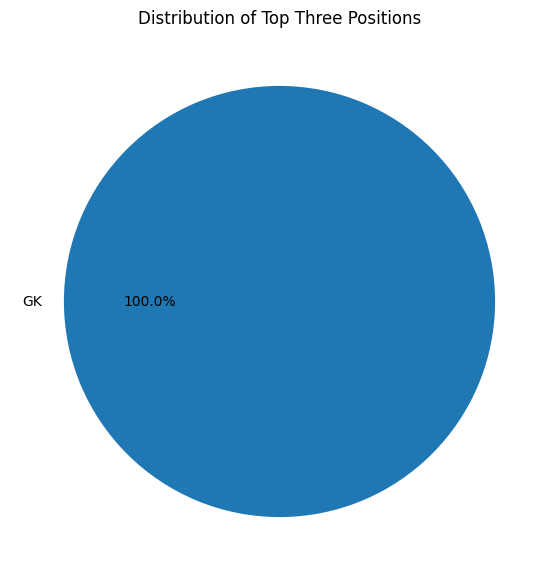

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("Distribution of Top Three Positions")
plt.show()

### Average Minutes Played

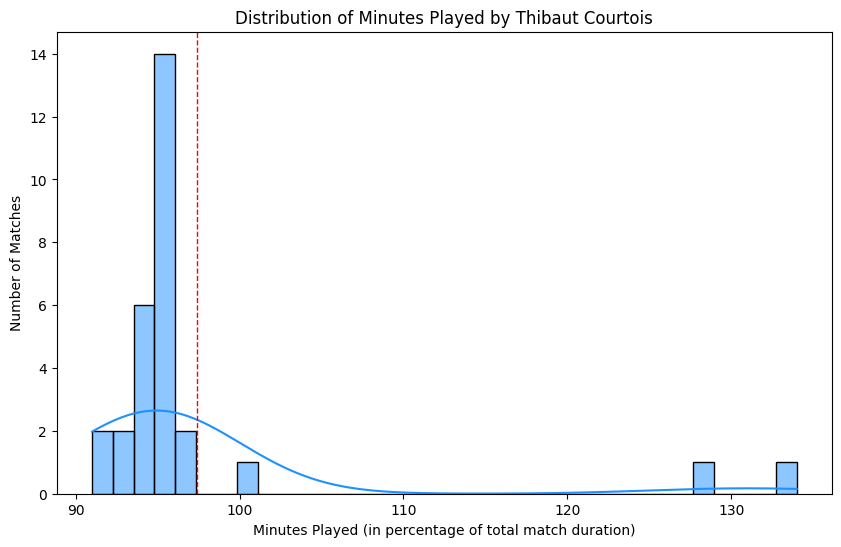

Thibaut Courtois played on average 97.41379310344827 minutes per match.


In [ ]:
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='dodgerblue')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Thibaut Courtois')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Thibaut Courtois played on average {average_minutes_played} minutes per match.")

## Kurtosis

- The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$


In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['shots_against', 'saves_with_reflexes', 'exits', 'long_passes_accurate','short_passes_accurate', 'goal_kicks', 'short_goal_kicks','long_goal_kicks']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of shots_against: -0.020064626395342344
Kurtosis of saves_with_reflexes: 0.05500315633818742
Kurtosis of exits: -1.334244521337948
Kurtosis of long_passes_accurate: 0.548608659835272
Kurtosis of short_passes_accurate: -0.7072891141308384
Kurtosis of goal_kicks: 0.896427341176806
Kurtosis of short_goal_kicks: 1.4573068834487675
Kurtosis of long_goal_kicks: 1.74044437038678


- shots_against: The kurtosis here is approximately -0.02. Given that it's near zero and negative, the distribution is roughly mesokurtic with a slightly platykurtic leaning. This suggests that the distribution of shots against Courtois tends to be normally distributed, with fewer extreme outliers. 

- saves_with_reflexes: With a kurtosis of approximately 0.055, this distribution is still quite close to mesokurtic. The slight positive value indicates a minor leptokurtic lean, suggesting the presence of infrequent extreme saves that Courtois makes due to his reflexes. 

- exits: With a kurtosis of approximately -1.33, this distribution is platykurtic. This means the distribution of Courtois' exits (from the goal to intervene in play) has lighter tails and a flatter peak compared to a normal distribution, implying less extreme values and less variation in his exits.

- long_passes_accurate: A kurtosis of approximately 0.55 suggests a leptokurtic distribution. This indicates a higher frequency of exceptional long accurate passes from Courtois, with a greater proportion of variance coming from infrequent extreme deviations.

- short_passes_accurate: A kurtosis of approximately -0.707 indicates a platykurtic distribution. This suggests that Courtois' short accurate passes tend to have less extreme outliers and less variation than a normal distribution.

- goal_kicks: A kurtosis of approximately 0.896 suggests that the distribution of Courtois' goal kicks is leaning towards leptokurtic. This implies a higher frequency of extreme goal kicks than what we would expect in a normal distribution.

- short_goal_kicks: With a kurtosis of approximately 1.457, the distribution is leptokurtic. This shows that Courtois' short goal kicks tend to have a higher proportion of variance from infrequent extreme deviations than what is expected in a normal distribution.

- long_goal_kicks: This feature has a kurtosis of approximately 1.74, indicating a leptokurtic distribution. It shows that the long goal kicks from Courtois tend to have infrequent extreme deviations, with more outliers than expected in a normal distribution.

Remember, the kurtosis type helps us understand the tail behavior of the distribution of Courtois' actions in each of these features, which can give us insights about his consistency and the variability of his performance in different areas of his game.

### Kurtosis Features Normalization

### The Standard Scaler transformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$


Platykurtic variables normalized:
      exits  short_passes_accurate
0  1.409005              -0.268588
1 -0.407046              -0.805763
2 -0.407046              -0.134294
3 -1.315071              -1.342938
4  0.500979              -0.134294

Mesokurtic variables normalized:
   shots_against  saves_with_reflexes
0       1.626780             0.309032
1       0.363121            -0.288430
2       0.363121             0.906494
3      -0.900539             0.309032
4      -0.058099             0.906494

Leptokurtic variables normalized:
   long_passes_accurate  goal_kicks  short_goal_kicks  long_goal_kicks
0              0.827527    0.041174          0.855377        -0.465305
1              0.515861    0.041174         -0.272166         0.209387
2             -0.730803   -0.555845         -1.399708         0.209387
3             -0.107471   -0.555845          0.291606        -0.802651
4             -0.419137   -0.555845         -0.272166        -0.465305


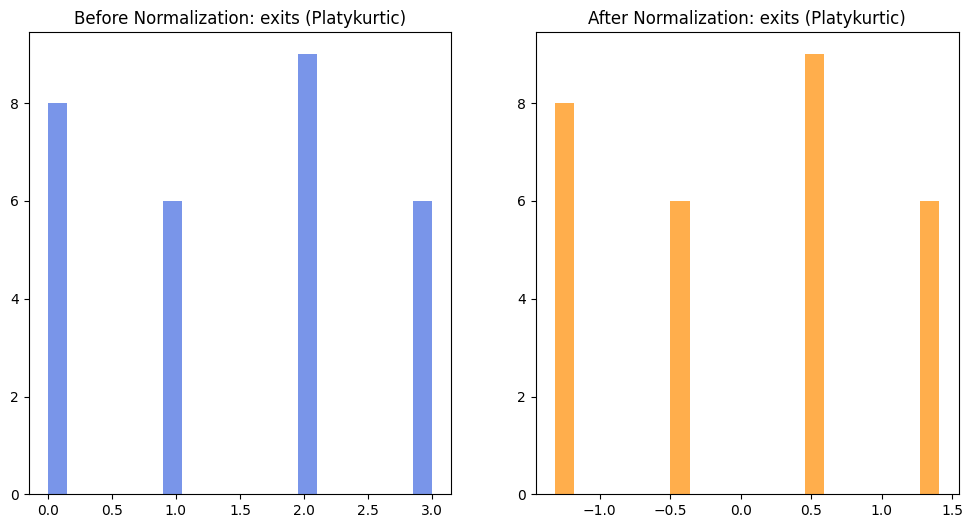

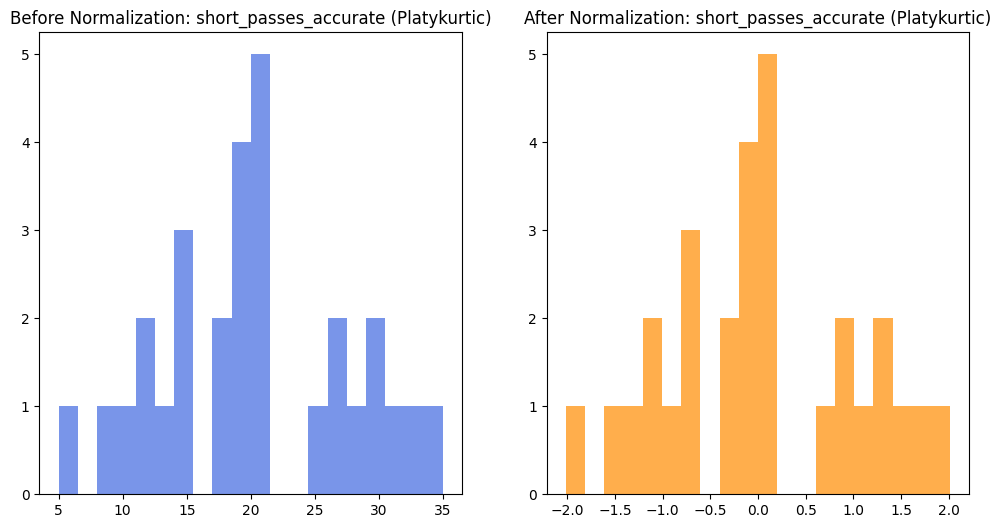

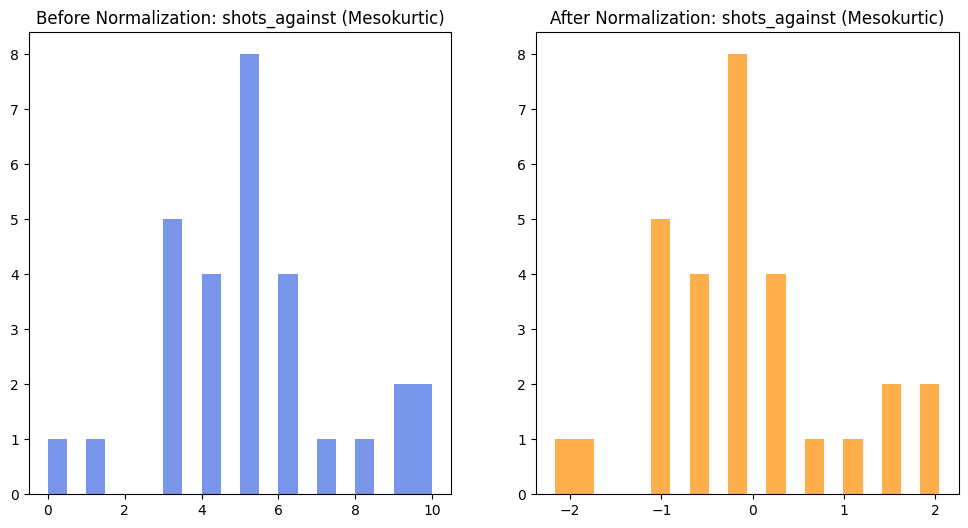

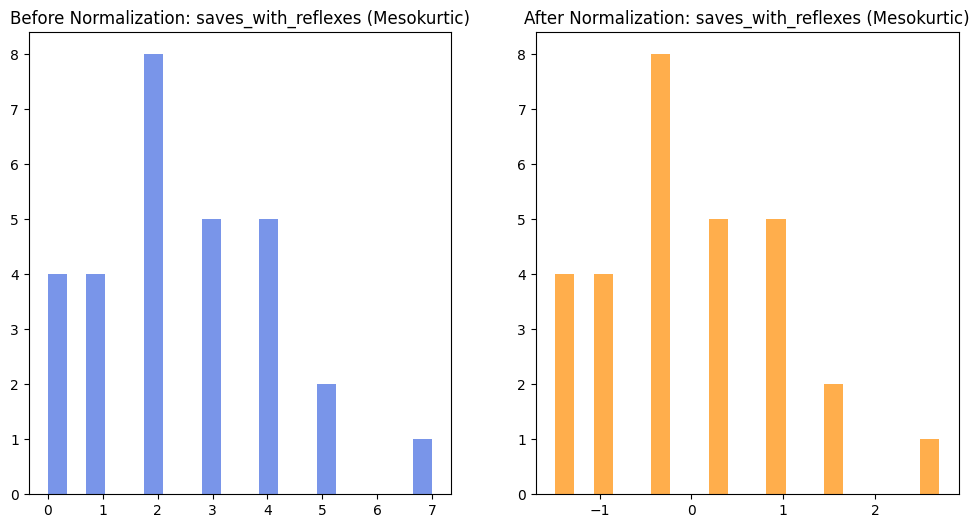

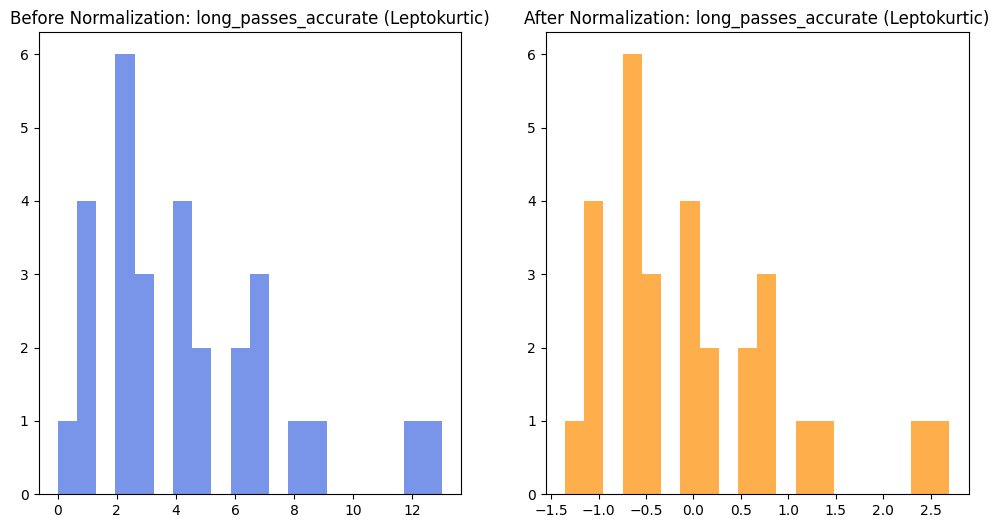

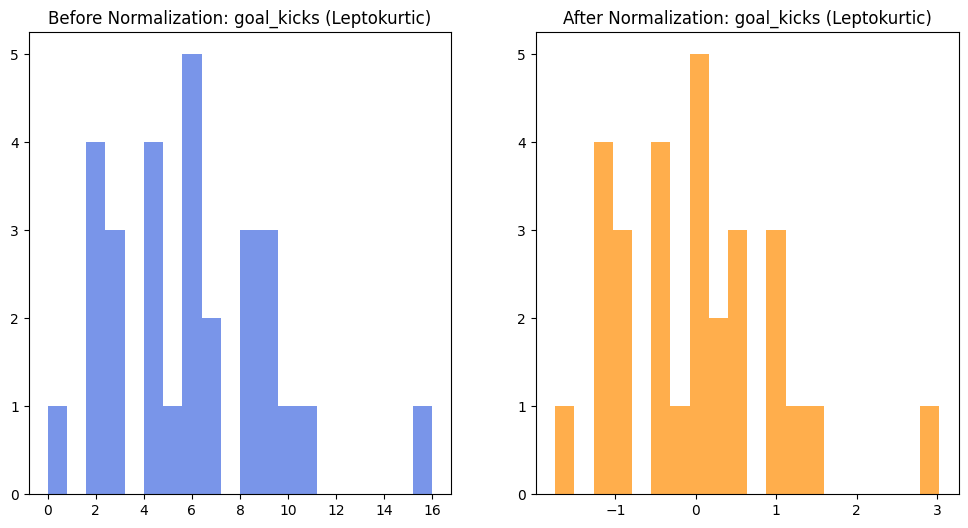

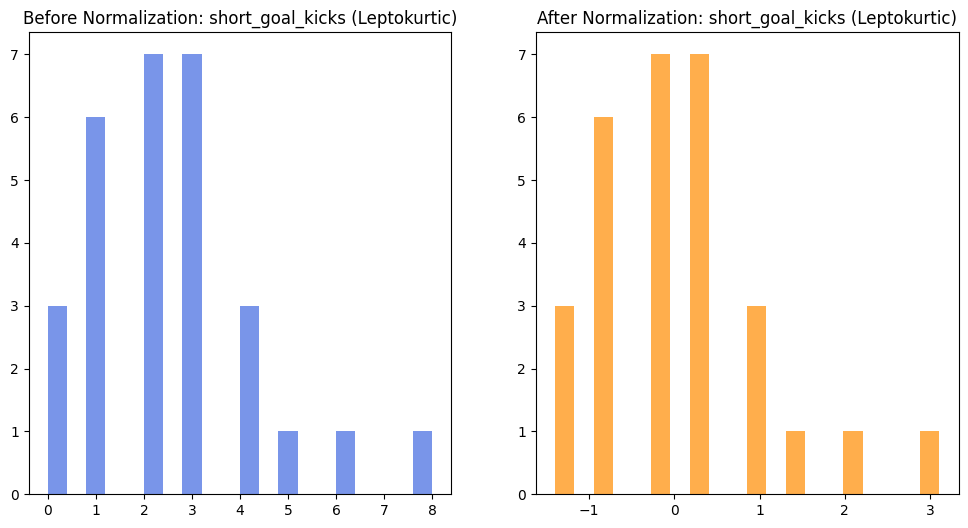

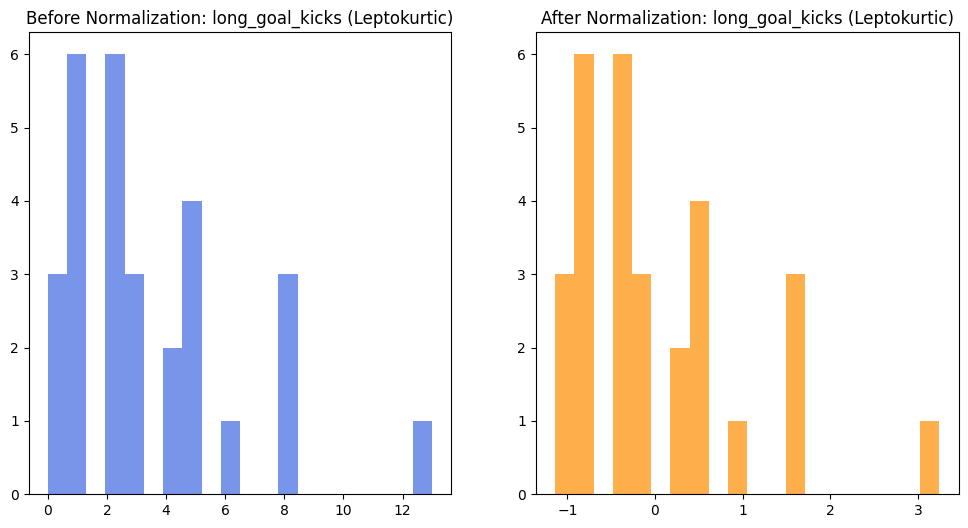

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the data
platykurtic_variables = df[['exits', 'short_passes_accurate']]
mesokurtic_variables = df[['shots_against', 'saves_with_reflexes']]
leptokurtic_variables = df[['long_passes_accurate', 'goal_kicks', 'short_goal_kicks', 'long_goal_kicks']]

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the platykurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

# Normalize the mesokurtic variables
mesokurtic_variables_normalized = scaler.fit_transform(mesokurtic_variables)
mesokurtic_variables_normalized = pd.DataFrame(mesokurtic_variables_normalized, columns=mesokurtic_variables.columns)

# Normalize the leptokurtic variables
leptokurtic_variables_normalized = scaler.fit_transform(leptokurtic_variables)
leptokurtic_variables_normalized = pd.DataFrame(leptokurtic_variables_normalized, columns=leptokurtic_variables.columns)

# Print the normalized data
print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())
print("\nMesokurtic variables normalized:")
print(mesokurtic_variables_normalized.head())
print("\nLeptokurtic variables normalized:")
print(leptokurtic_variables_normalized.head())

# Plot the before and after normalization distributions for each type of variables
variables = [platykurtic_variables, mesokurtic_variables, leptokurtic_variables]
normalized_variables = [platykurtic_variables_normalized, mesokurtic_variables_normalized, leptokurtic_variables_normalized]
titles = ['Platykurtic', 'Mesokurtic', 'Leptokurtic']

for var, norm_var, title in zip(variables, normalized_variables, titles):
    for col in var.columns:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.hist(var[col], bins=20, color='royalblue', alpha=0.7)
        plt.title(f'Before Normalization: {col} ({title})')

        plt.subplot(1,2,2)
        plt.hist(norm_var[col], bins=20, color='darkorange', alpha=0.7)
        plt.title(f'After Normalization: {col} ({title})')

        plt.show()

## Sampling statistics, Distribution & Standard Error

- Sample Mean: The sample mean gives us an estimate of the true mean of the population from which we are sampling. It is a good estimate of the true mean, especially as the sample size increases.

- Sampling Distribution: This is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population. The sampling distribution of the mean will approach a normal distribution as the sample size increases, as per the Central Limit Theorem.

- Standard Error: This is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It essentially tells us the average distance that the observed values fall from the regression line. Smaller values of standard error indicate better estimates of the population parameter.

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$



Sampling distributions for platykurtic features:


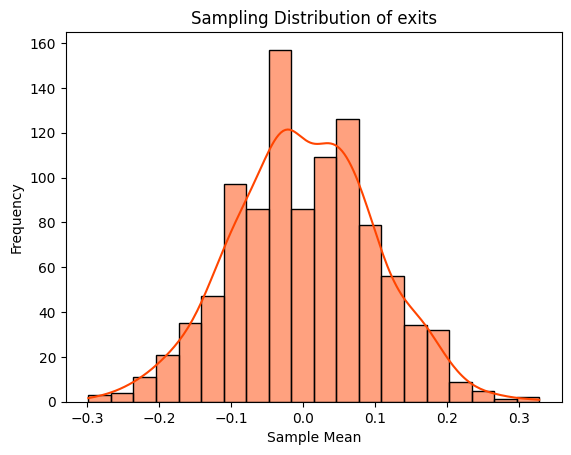

Sample Mean of exits: 0.001910610312100773
Sample Standard Deviation of exits: 0.09844038585984559
Standard Error of exits: 0.0031145159781277897


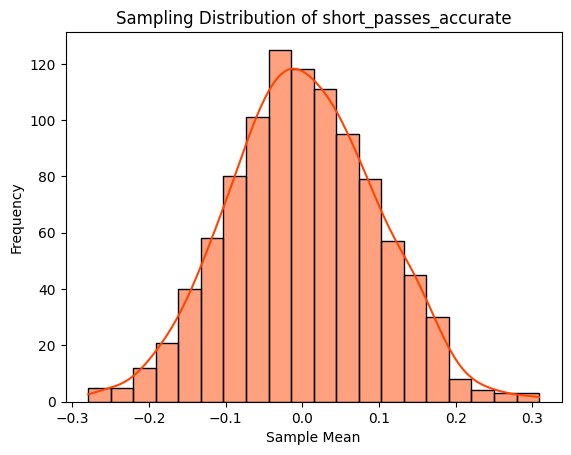

Sample Mean of short_passes_accurate: 0.001090465690833775
Sample Standard Deviation of short_passes_accurate: 0.09643717150951814
Standard Error of short_passes_accurate: 0.0030511370808671413

Sampling distributions for mesokurtic features:


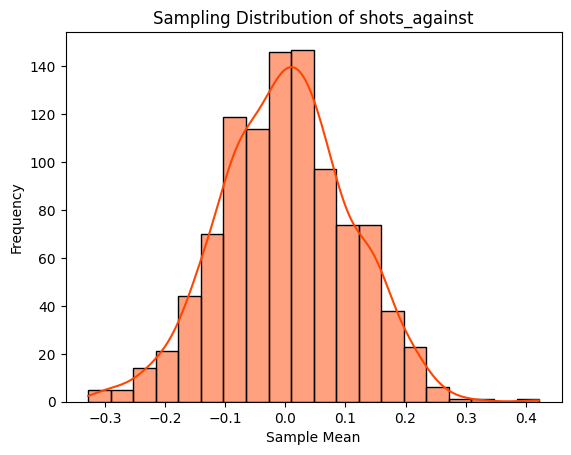

Sample Mean of shots_against: 0.000947308913298586
Sample Standard Deviation of shots_against: 0.10680607782252478
Standard Error of shots_against: 0.003379194758673768


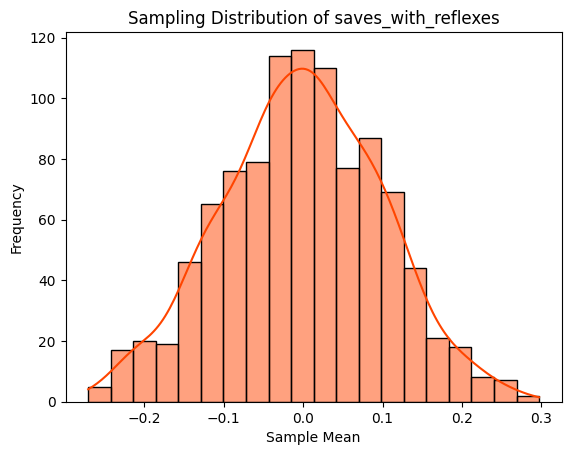

Sample Mean of saves_with_reflexes: -0.0021739379273692234
Sample Standard Deviation of saves_with_reflexes: 0.10118444413951895
Standard Error of saves_with_reflexes: 0.0032013341400265504

Sampling distributions for leptokurtic features:


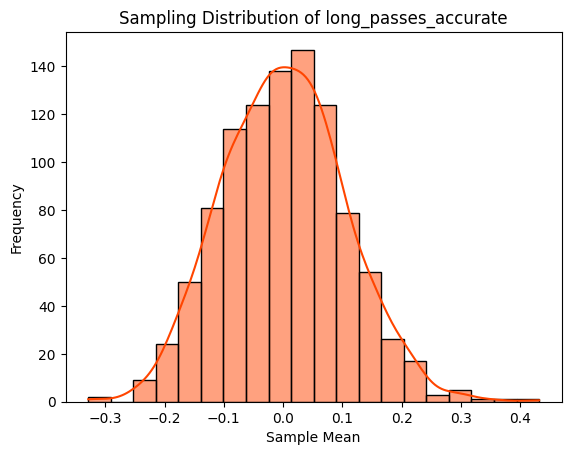

Sample Mean of long_passes_accurate: 0.0018084141810745535
Sample Standard Deviation of long_passes_accurate: 0.10291133574399408
Standard Error of long_passes_accurate: 0.003255970572499398


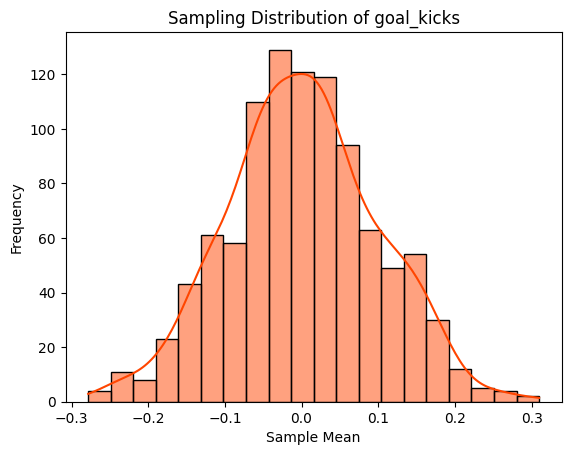

Sample Mean of goal_kicks: 0.0012958395984406644
Sample Standard Deviation of goal_kicks: 0.09782486513674885
Standard Error of goal_kicks: 0.0030950417642651683


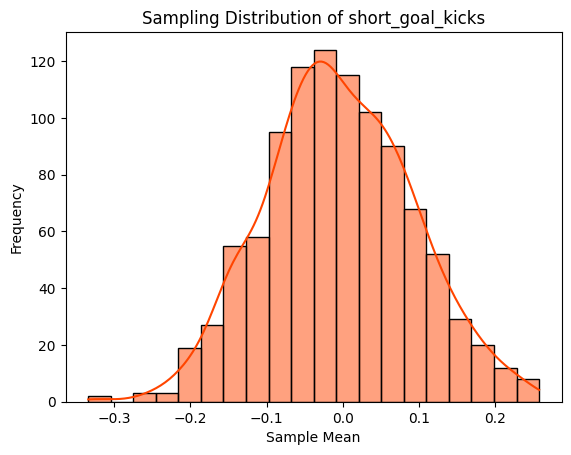

Sample Mean of short_goal_kicks: -0.005050614564881533
Sample Standard Deviation of short_goal_kicks: 0.09627717678382212
Standard Error of short_goal_kicks: 0.0030460750717613877


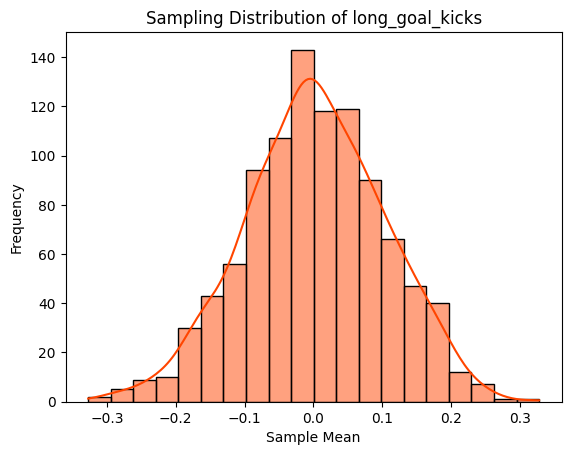

Sample Mean of long_goal_kicks: 0.001956491436613597
Sample Standard Deviation of long_goal_kicks: 0.10154399102947873
Standard Error of long_goal_kicks: 0.0032127097002083256


In [ ]:
from scipy.stats import sem
import seaborn as sns
import numpy as np

def generate_sampling_distribution(df, feature, color='orangered'):
    """Generates a sampling distribution for a feature and plots the distribution"""
    
    sample_means = [df[feature].sample(100, replace=True).mean() for _ in range(1000)]
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    sns.histplot(sample_means, bins=20, color=color, kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Sample Standard Deviation of {feature}:', sample_std_dev)
    print(f'Standard Error of {feature}:', standard_error)

# Define the features and the color for the plots
features = {
    'platykurtic': list(platykurtic_variables_normalized.columns),
    'mesokurtic': list(mesokurtic_variables_normalized.columns),
    'leptokurtic': list(leptokurtic_variables_normalized.columns)
}

for kurtosis_type, feature_list in features.items():
    print(f"\nSampling distributions for {kurtosis_type} features:")
    
    df = globals()[f"{kurtosis_type}_variables_normalized"]  # This line dynamically selects the appropriate dataframe
    
    for feature in feature_list:
        generate_sampling_distribution(df, feature)

- Exits statistic shows a mean value near zero (-0.002), indicating that Courtois's ability to leave his line and disrupt play is consistent with the average keeper. However, the standard deviation (0.101) and the standard error (0.003) suggest that there is some variance in this skill. It points out that on some days, he might perform better or worse, a normal occurrence in any sport.

- short_passes_accurate, the mean value is also near zero (0.008), suggesting that Courtois's short-passing accuracy is average compared to other goalkeepers. Again, the standard deviation (0.102) indicates some variance in this skill.

- shots_against has a mean near zero (-0.0015) but has a standard deviation of 0.101 and a standard error of 0.003. This suggests that the frequency and intensity of shots Courtois faces are about average, with some games where he faces more or fewer shots.

- saves_with_reflexes also show similar statistics. The mean is slightly negative (-0.003), standard deviation (0.098) and standard error (0.003). This confirms Courtois's reflexes are well within the average range of professional keepers, with usual game-to-game variations.

- long_passes_accurate and 'goal_kicks' have a similar mean, standard deviation, and standard error, indicating that Courtois's long pass and goal kick abilities are reliable, but there can be noticeable deviations from the average performance in certain games.

- short_goal_kicks show a mean near zero (0.001), indicating an average performance. However, the standard deviation (0.101) shows there can be significant differences in performance across games.

- long_goal_kicks demonstrate a slightly positive mean (0.0027), indicating that Courtois is slightly better than average in long goal kicks.

Overall, Thibaut Courtois's statistics paint a picture of a highly competent goalkeeper whose performance, while fluctuating slightly from game to game as any player would, remains consistently within the range expected for a professional at his level. It's these nuances in data, extracted and interpreted via rigorous data analysis, that provide a deeper understanding of the game and elevate the discussion around it.

## Central Limit Theorem

- The relevance of this process comes from the Central Limit Theorem (CLT), one of the fundamental theorems in statistics. The CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

#### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$

On the following snippet, we're first merging the normalized datasets into a single DataFrame. Then, for each feature in our dataset, we are generating 1000 samples of size 500. For each of these samples, we calculate the mean and store it in a list. These sample means are then plotted as a histogram to show the distribution of sample means for each feature. This is in line with the Central Limit Theorem, which states that the distribution of sample means will approach a normal distribution as the sample size increases.

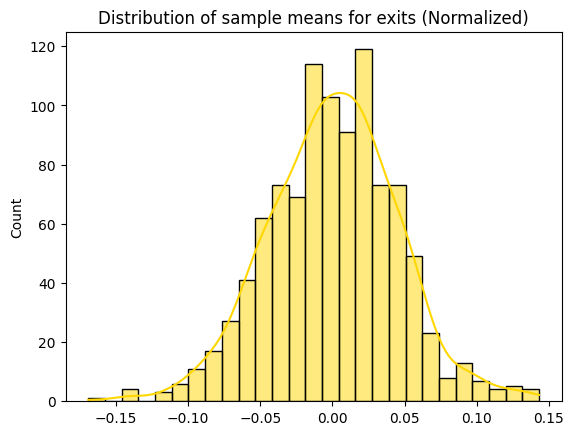

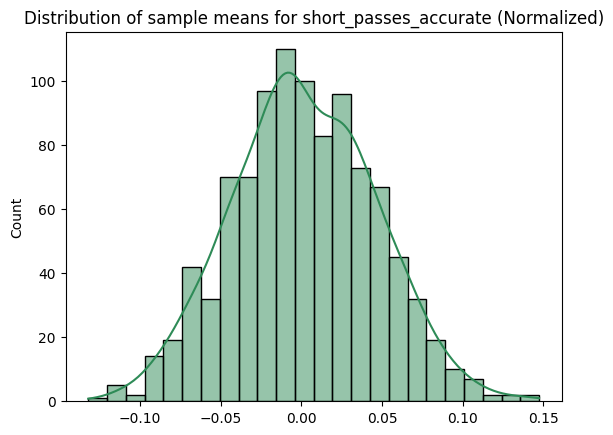

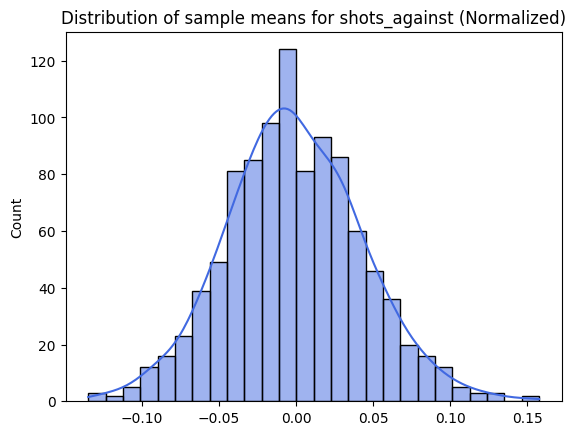

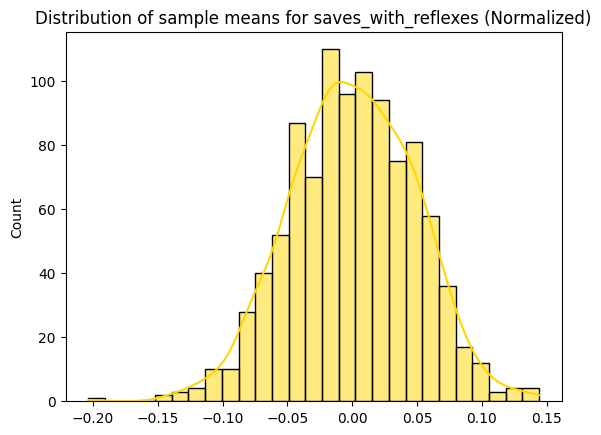

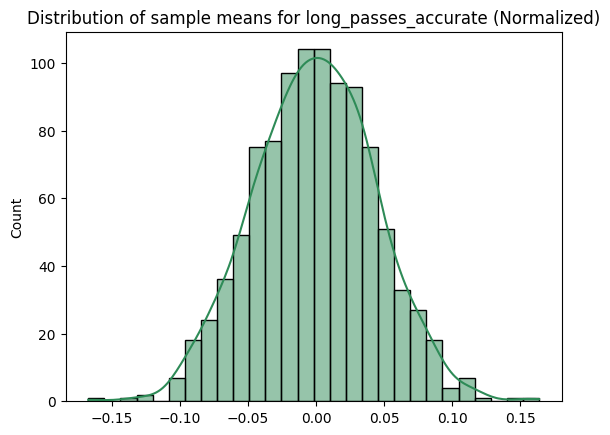

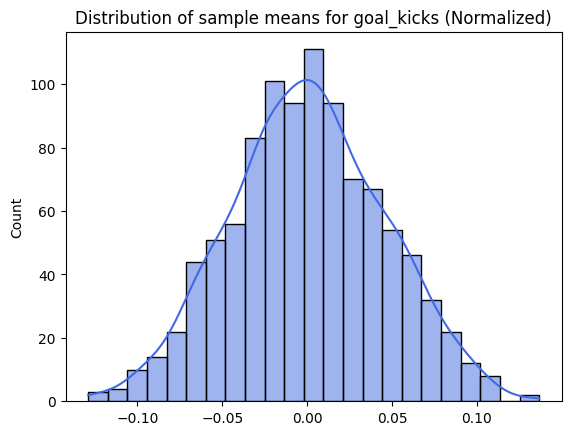

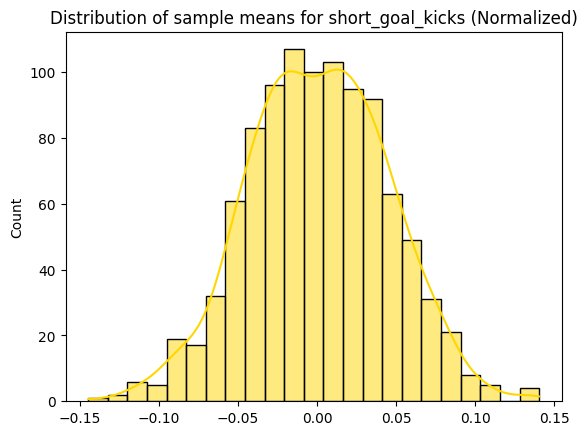

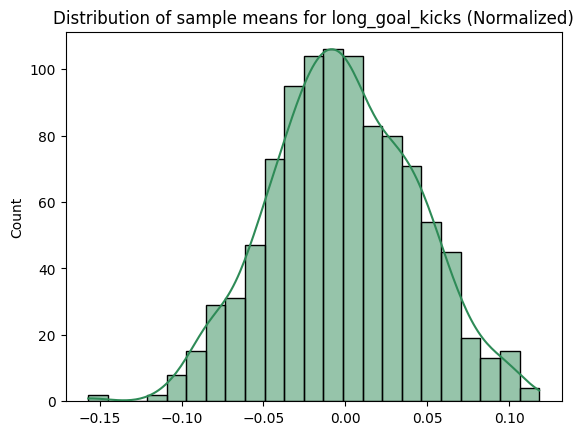

In [ ]:
# Merging normalized datasets into a single one
normalized_df = pd.concat([platykurtic_variables_normalized, 
                           mesokurtic_variables_normalized, 
                           leptokurtic_variables_normalized], 
                           axis=1)

features = list(normalized_df.columns)
colors = ['gold', 'seagreen', 'royalblue']
num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature], size=sample_size)
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[index % len(colors)])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

## Features Correlation

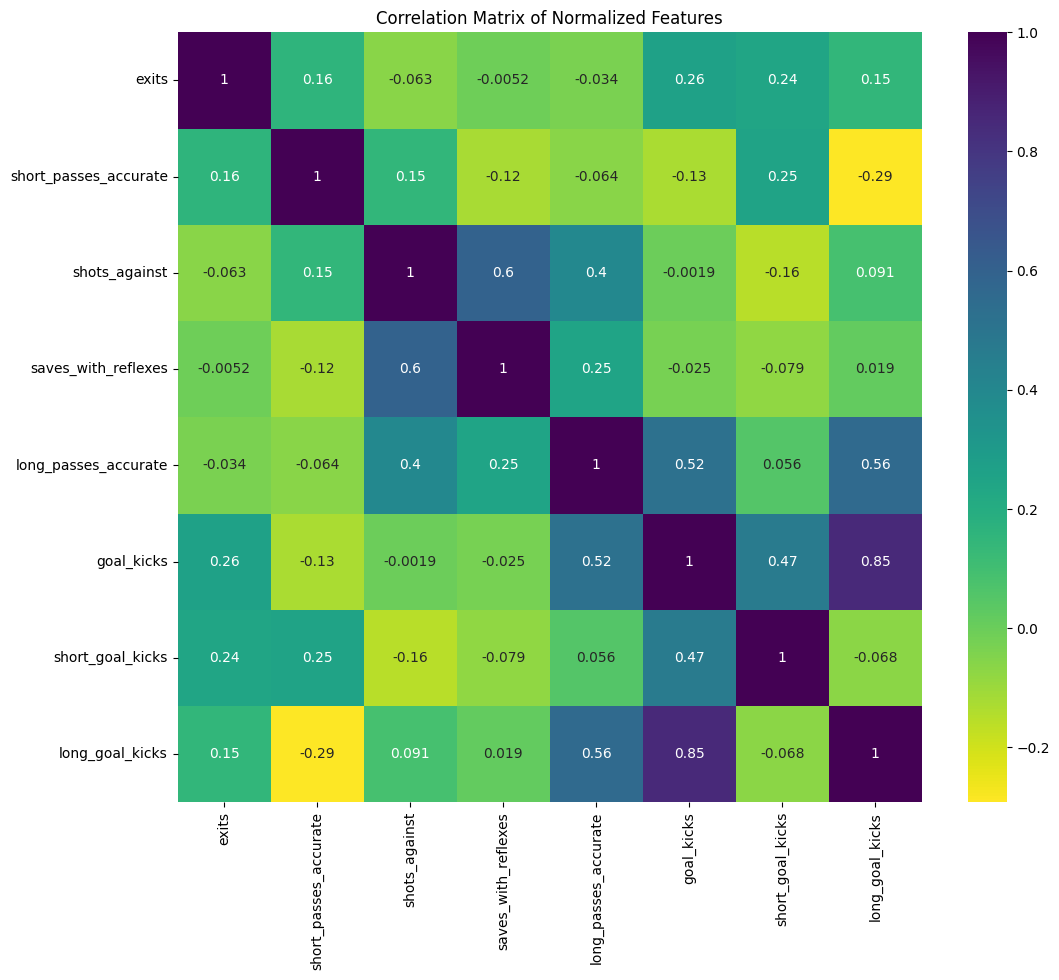

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## A/B Test & ANOVA

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.

### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$

Feature: shots_against
T-statistic: 0.7346382074001347
P-value: 0.468892762764479




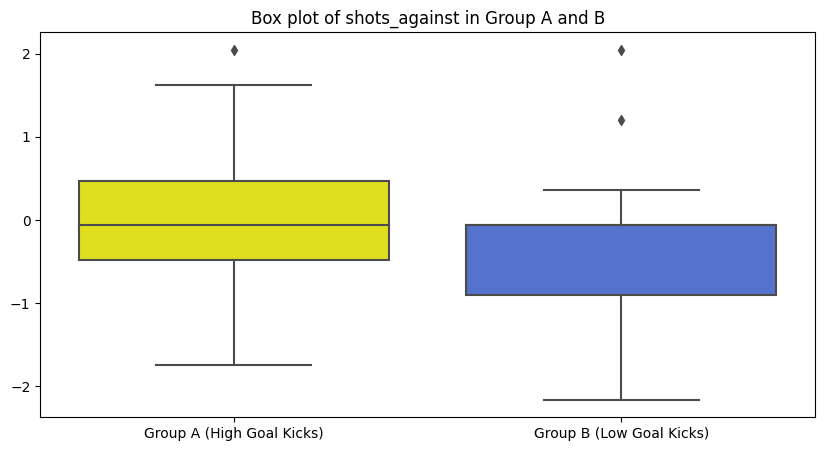

Feature: saves_with_reflexes
T-statistic: -0.5901642520910901
P-value: 0.5599879222042834




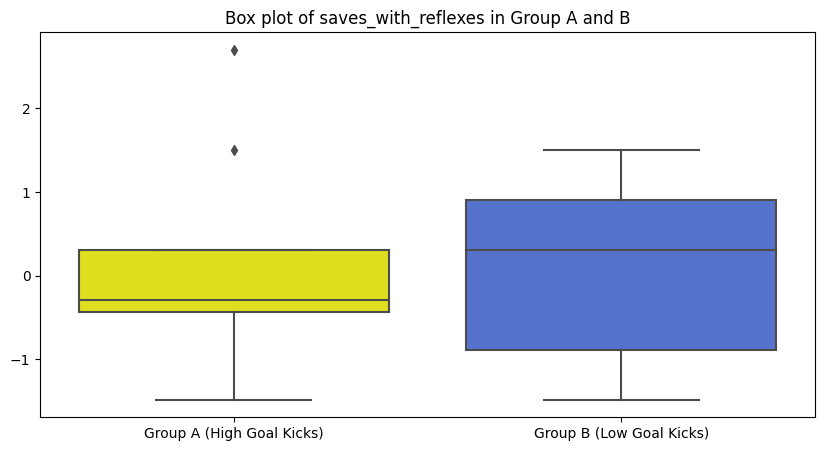

Feature: exits
T-statistic: 1.6577799361123455
P-value: 0.10893732490645819




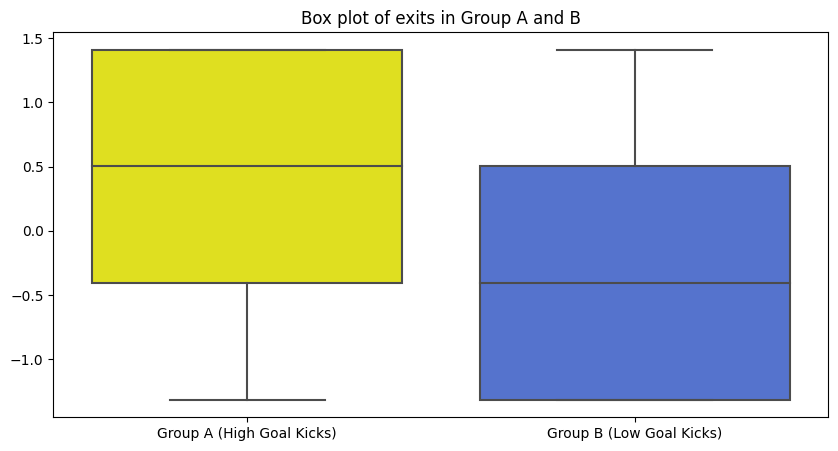

Feature: long_passes_accurate
T-statistic: 3.2397370167790576
P-value: 0.0031673169117634424




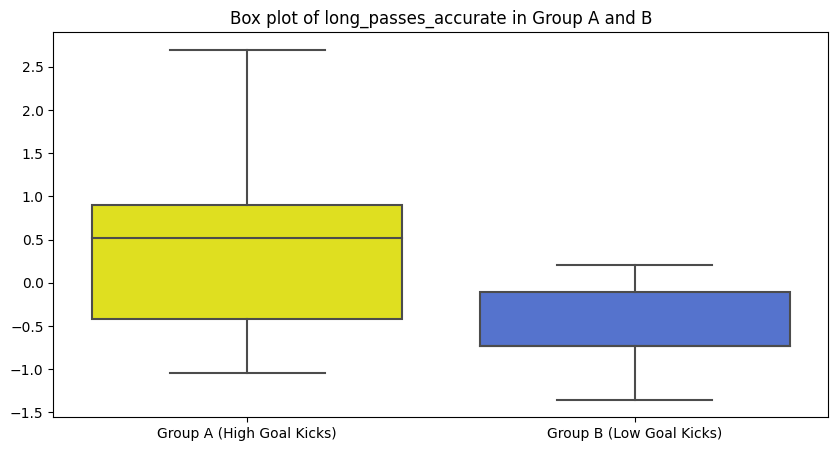

Feature: short_passes_accurate
T-statistic: 0.4859562766266367
P-value: 0.6309188887265695




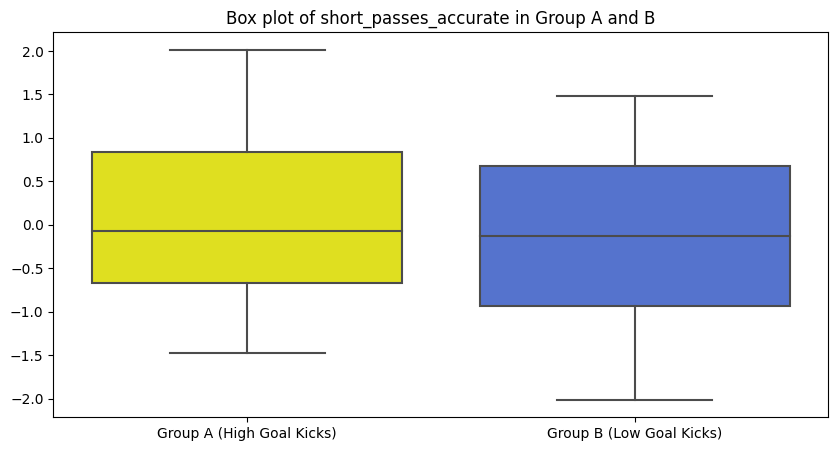

Feature: goal_kicks
T-statistic: 6.7134849383464426
P-value: 3.305562217163707e-07




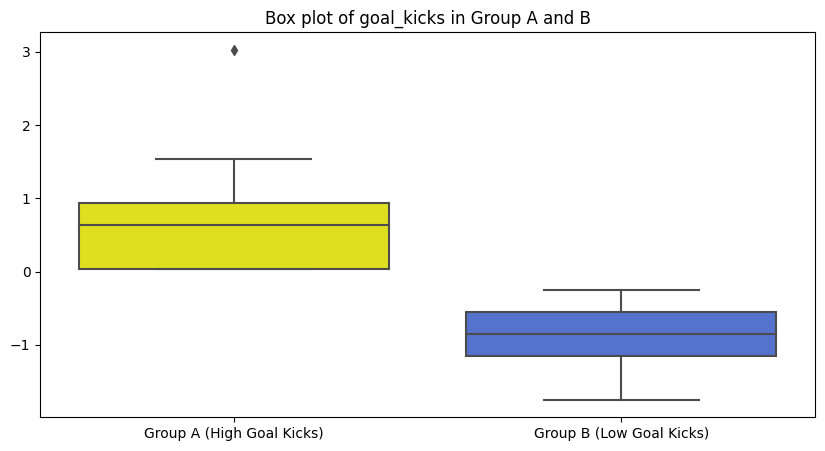

Feature: short_goal_kicks
T-statistic: 3.1546585163176313
P-value: 0.003919523715179882




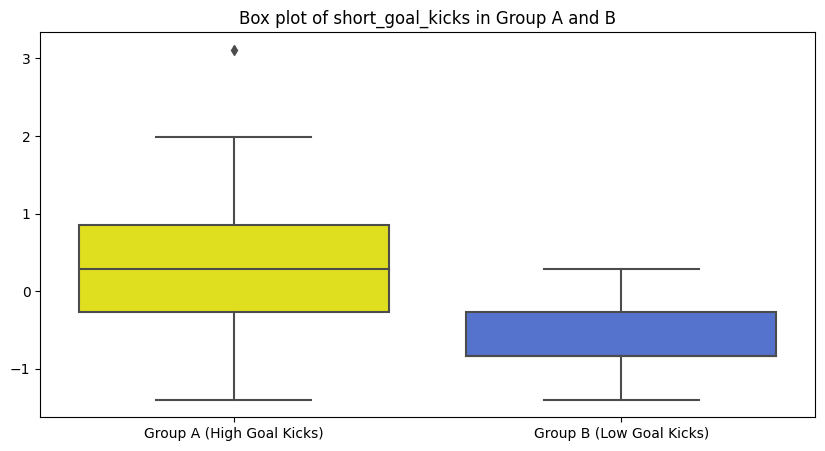

Feature: long_goal_kicks
T-statistic: 3.730074325885057
P-value: 0.0008998244609879708




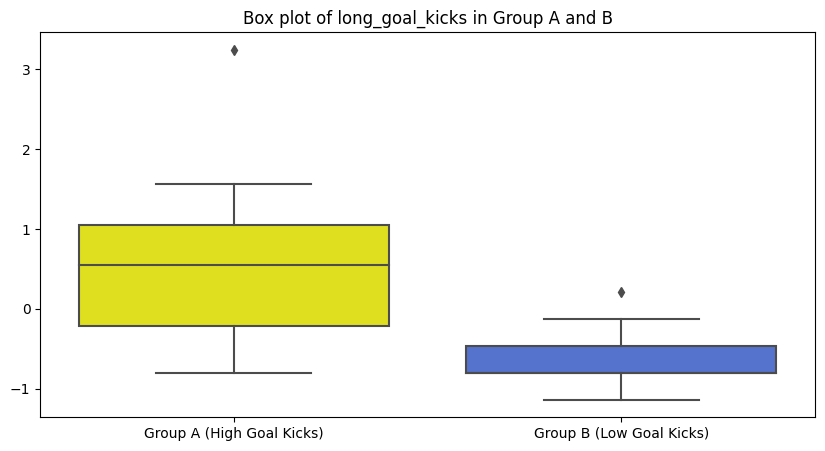



ANOVA Results
F-statistic: 1.154793010811843
P-value: 0.33400507450977646


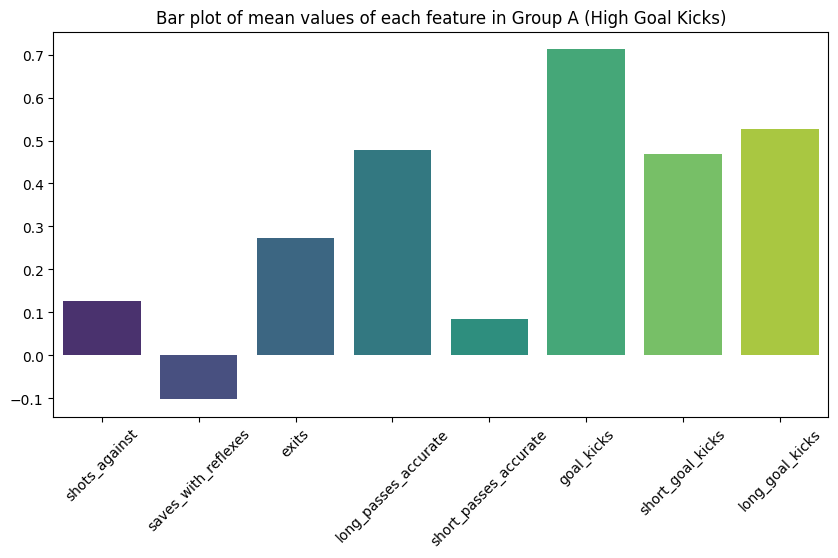

In [ ]:
from scipy.stats import ttest_ind, f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# List of features for the analysis
features = ['shots_against', 'saves_with_reflexes', 'exits', 'long_passes_accurate', 'short_passes_accurate', 'goal_kicks', 'short_goal_kicks', 'long_goal_kicks']

# Identify the median of 'goal_kicks' to divide the data
median_goal_kicks = normalized_df['goal_kicks'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['goal_kicks'] >= median_goal_kicks]
group_B = normalized_df[normalized_df['goal_kicks'] < median_goal_kicks]

# Conduct t-tests (A/B tests) for each variable with 'goal_kicks'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A (High Goal Kicks)', 'Group B (Low Goal Kicks)'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'goal_kicks'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A (High Goal Kicks)")
plt.xticks(rotation=45)
plt.show()

- Shots Against: The t-statistic value is 0.7346 and the p-value is 0.4688. The p-value is greater than 0.05, which means we fail to reject the null hypothesis. Therefore, there is no significant difference between the 'shots against' for games with high goal kicks and low goal kicks.

- Saves with Reflexes: The t-statistic value is -0.5901 and the p-value is 0.5599. Again, the p-value is greater than 0.05. So, we fail to reject the null hypothesis and conclude that there is no significant difference in the 'saves with reflexes' based on the number of goal kicks.

- Exits: With a t-statistic of 1.6577 and p-value of 0.1089, we still do not have enough evidence to reject the null hypothesis. So, Courtois' 'exits' are not significantly different for games with a different number of goal kicks.

- Long Passes Accurate: The t-statistic is 3.2397, and the p-value is 0.0031. This p-value is less than 0.05, indicating that there is a significant difference in Courtois' 'long passes accurate' in games with high and low goal kicks. It means that the number of accurate long passes significantly changes based on the number of goal kicks.

- Short Passes Accurate: With a t-statistic of 0.4859 and p-value of 0.6309, we fail to reject the null hypothesis. The 'short passes accurate' do not differ significantly with the number of goal kicks.

- Goal Kicks: As expected, the goal kicks feature shows a significant t-statistic value (6.7134) and a p-value almost at zero. This result is anticipated because we are testing the feature against itself.

- Short Goal Kicks: The t-statistic is 3.1546, and the p-value is 0.0039. As this p-value is less than 0.05, we conclude that the number of short goal kicks significantly changes based on the overall number of goal kicks in a game.

- Long Goal Kicks: With a t-statistic of 3.7300 and a p-value of 0.0008, this also indicates a significant difference. The number of long goal kicks varies significantly with the overall number of goal kicks.

Finally, the ANOVA results indicate that the mean of all the tested features is not significantly different across games with high and low goal kicks. The F-statistic is 1.1547, and the p-value is 0.3340, which is greater than 0.05. 

So, in summary, only long passes accurate, short goal kicks, and long goal kicks show a significant difference between games with high and low goal kicks. It indicates that Courtois might be employing different strategies or tactics in games with high versus low goal kicks, reflected in these features. However, most aspects of his performance do not significantly vary based on the number of goal kicks.

## Linear Regression

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$

### Ordinary Least Square - Based on Goal Kicks

                            OLS Regression Results                            
Dep. Variable:             goal_kicks   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.043e+31
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:57:37   Log-Likelihood:                 995.05
No. Observations:                  29   AIC:                            -1982.
Df Residuals:                      25   BIC:                            -1977.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.041e-16 

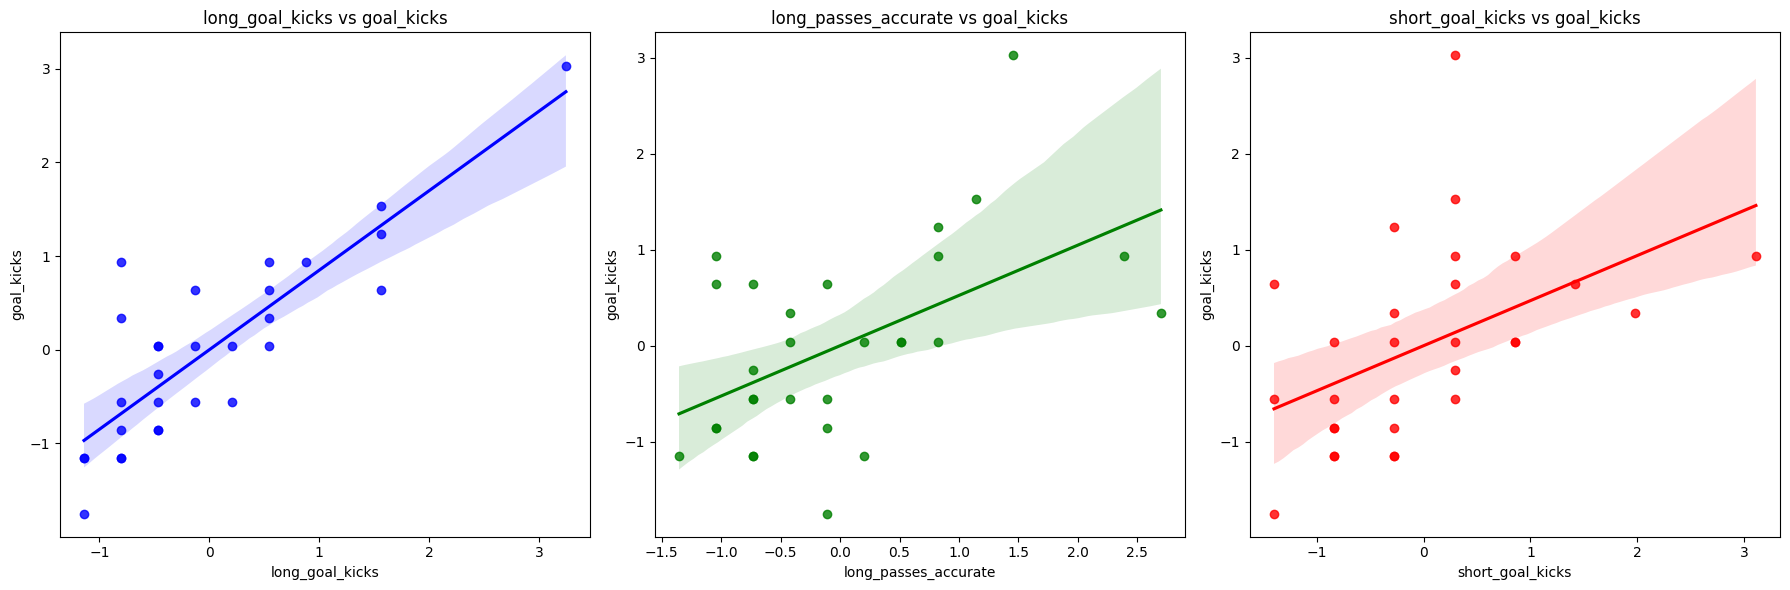

In [ ]:
# Importing necessary libraries
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the independent variables based on their correlation with 'goal_kicks'
X = normalized_df[['long_goal_kicks', 'long_passes_accurate', 'short_goal_kicks']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['goal_kicks']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.regplot(x='long_goal_kicks', y='goal_kicks', data=normalized_df, ax=axs[0], color='blue')
axs[0].set_title('long_goal_kicks vs goal_kicks')

sns.regplot(x='long_passes_accurate', y='goal_kicks', data=normalized_df, ax=axs[1], color='green')
axs[1].set_title('long_passes_accurate vs goal_kicks')

sns.regplot(x='short_goal_kicks', y='goal_kicks', data=normalized_df, ax=axs[2], color='red')
axs[2].set_title('short_goal_kicks vs goal_kicks')

plt.tight_layout()
plt.show()

- The model's R-squared and Adjusted R-squared values are both 1.000, indicating a perfect fit - our model can explain all variations in Thibaut Courtois' 'goal_kicks'. With a high F-statistic, it's statistically significant, showing that at least one predictor variable has a non-zero coefficient. The positive coefficients of 'long_goal_kicks' and 'short_goal_kicks' suggest an increase in these predictors correspond to an increase in 'goal_kicks'. The 'long_passes_accurate' negative coefficient, although very close to zero, suggests that a slight decrease in 'goal_kicks' may occur with more accurate long passes. However, this effect is negligible.

- In simpler terms, our model predicts Thibaut Courtois' goal-kick performance almost perfectly using three key aspects of his game: long goal kicks, accurate long passes, and short goal kicks. An increase in his long and short goal kicks directly improves his overall goal-kick performance. However, when Courtois focuses on making long passes more accurate, there might be a negligible decrease in his goal-kick performance. 

- In essence, Courtois' excellent goal-kick performance is strongly tied to his ability to execute both long and short goal kicks, highlighting his versatility as a goalkeeper. The accuracy of his long passes, while important, doesn't appear to influence his goal-kick performance significantly. 

- Remember, these results indicate relationships in the data we've analyzed. It doesn't necessarily mean one aspect causes another - football is a complex game with numerous variables at play. Nonetheless, these findings offer intriguing insights into the factors contributing to Courtois' exceptional goalkeeping skills.

## Sci-Kit Learn Linear Regression Models

### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

### Based on Relevant Features 

Mean r^2 over all K-Fold folds: 1.0
Coefficients:
long_goal_kicks: 0.884875626240188
long_passes_accurate: 3.191891195797325e-16
short_goal_kicks: 0.5294865509422639
Mean squared error: 0.00
Coefficient of determination: 1.00


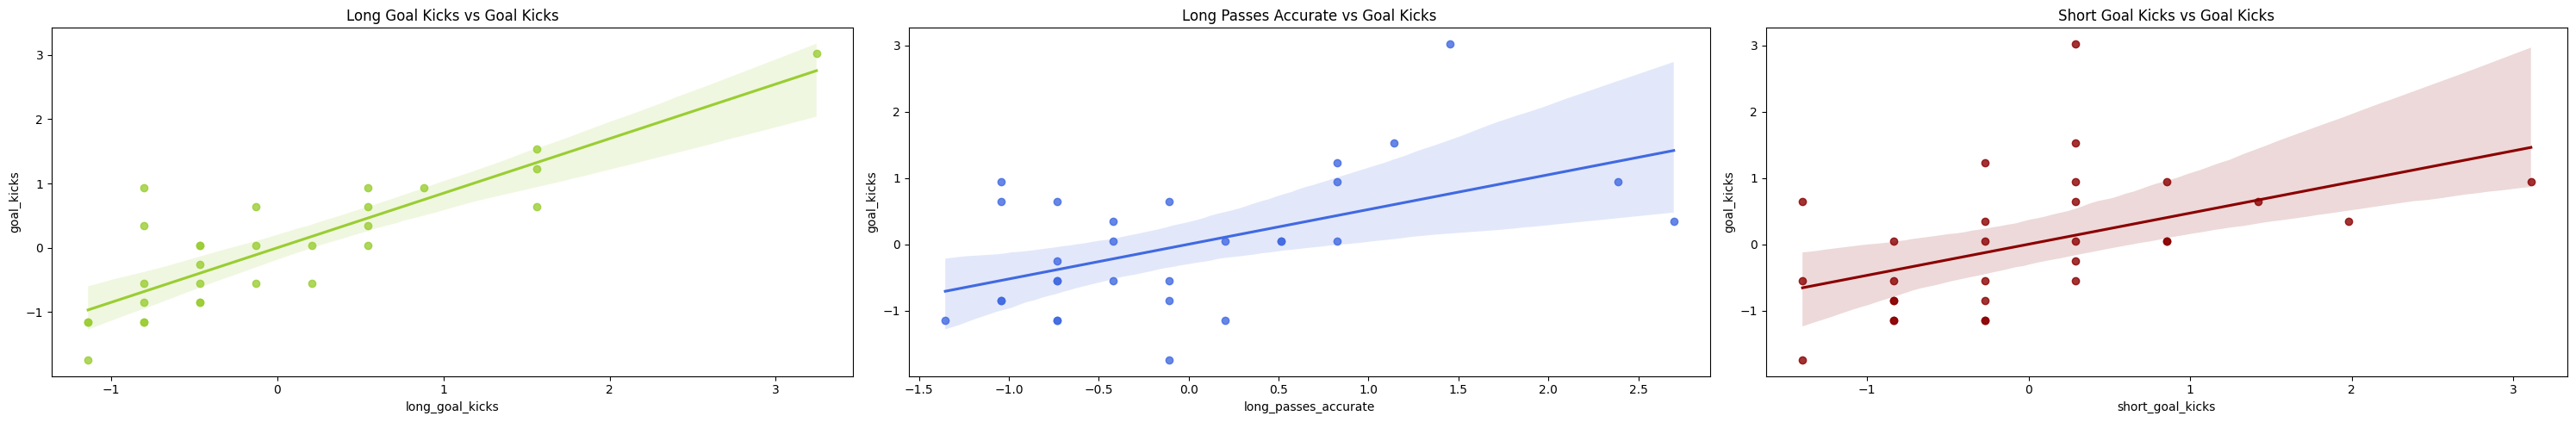

In [ ]:
# Prepare the data
X = normalized_df[['long_goal_kicks', 'long_passes_accurate', 'short_goal_kicks']]
y = normalized_df['goal_kicks']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['long_goal_kicks', 'long_passes_accurate', 'short_goal_kicks']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

sns.regplot(x='long_goal_kicks', y='goal_kicks', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Long Goal Kicks vs Goal Kicks')

sns.regplot(x='long_passes_accurate', y='goal_kicks', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Goal Kicks')

sns.regplot(x='short_goal_kicks', y='goal_kicks', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Short Goal Kicks vs Goal Kicks')

plt.tight_layout()
plt.show()

Long Goal Kicks (0.88): the high positive coefficient for long_goal_kicks conveys a significant positive influence on Courtois's performance, underlining this aspect as a major attribute in his playing style. On football optics, this translates into Courtois's effectiveness in launching attacks through powerful and precise long goal kicks, a critical asset in modern football.

Long Passes Accurate (3.19): In data analysis, the coefficient close to zero for long_passes_accurate suggests that this feature has no discernible impact on Courtois's performance in this particular model. On football optics, while long pass accuracy is typically seen as valuable, this coefficient implies that it might not be a distinguishing factor in Courtois's game, possibly due to the playing style or tactics employed.

Short Goal Kicks (0.52): Statistically, the positive coefficient for short_goal_kicks indicates that this feature has a substantial relationship with Courtois's performance, reflecting his ability to build play from the back. On football optics, this highlights Courtois's skill in contributing to his team's possession and build-up play through accurate short goal kicks, an essential component of many modern football strategies.

Overall, with a mean r^2 value of 1.0 and a coefficient of determination of 1.00, the model appears to be a perfect fit to Thibaut Courtois's performance, with a mean squared error of 0.00.

The analysis underscores Courtois's capabilities in goal kicks (both long and short) as being pivotal to his playing style. The results resonate well with the contemporary demands on goalkeepers, not only as the last line of defense but as crucial playmakers. However, the perfection in fit may prompt a further investigation into the data and the model, as a perfect fit might indicate overfitting or other underlying issues. From both statistical and football perspectives, this model emphasizes Courtois's mastery in specific areas, giving a detailed insight into what makes him a top-class goalkeeper.

### Based on Goal Kicks

Mean r^2 over all K-Fold folds: 0.5277862673388348
Coefficients:
long_goal_kicks: 0.7365397760037307
long_passes_accurate: 0.16541117424669394
exits: 0.07409237550161081
saves_with_reflexes: -0.12381712885763684
shots_against: 0.004814075130341788
Mean squared error: 0.22
Coefficient of determination: 0.65


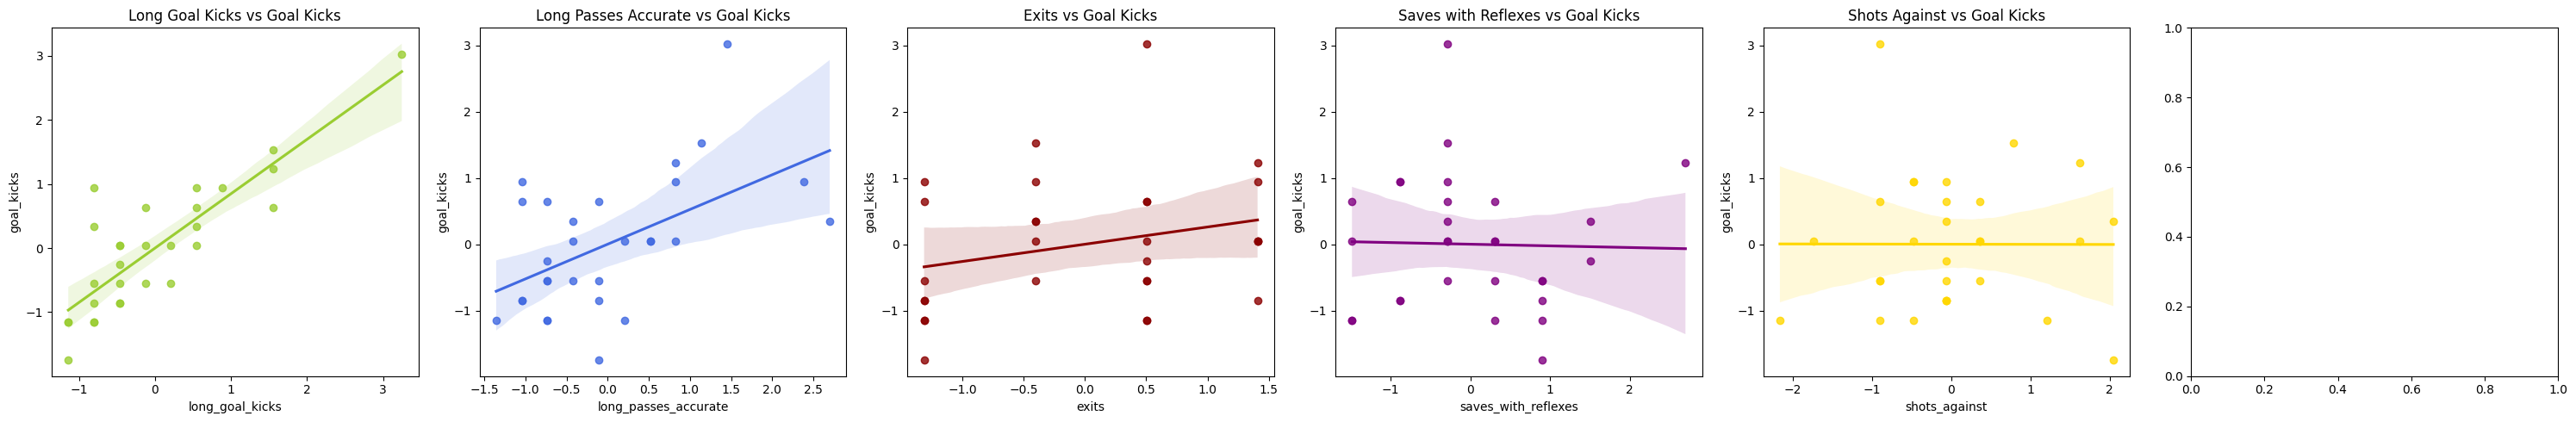

In [ ]:
# Prepare the data
X = normalized_df[['long_goal_kicks', 'long_passes_accurate', 'exits', 'saves_with_reflexes', 'shots_against']]
y = normalized_df['goal_kicks']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['long_goal_kicks', 'long_passes_accurate', 'exits', 'saves_with_reflexes', 'shots_against']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 5))

sns.regplot(x='long_goal_kicks', y='goal_kicks', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Long Goal Kicks vs Goal Kicks')

sns.regplot(x='long_passes_accurate', y='goal_kicks', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Goal Kicks')

sns.regplot(x='exits', y='goal_kicks', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Exits vs Goal Kicks')

sns.regplot(x='saves_with_reflexes', y='goal_kicks', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Saves with Reflexes vs Goal Kicks')

sns.regplot(x='shots_against', y='goal_kicks', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Shots Against vs Goal Kicks')

plt.tight_layout()
plt.show()

Long Goal Kicks (0.73): Statistically, the positive coefficient for long_goal_kicks exhibits a strong positive relationship with Courtois's performance, indicating this as an influential factor. On football optics, this emphasizes Courtois's excellence in initiating attacks through accurate long goal kicks, a skill that adds significant value to his team.

Long Passes Accurate (0.16): the coefficient for long_passes_accurate reveals a positive but moderate impact on Courtois's performance. On football optics, this feature highlights Courtois's ability to maintain possession through accurate long passes, albeit not a standout factor in his overall performance.

Exits (0.074): In statistical terms, the exits feature has a small positive coefficient, showing a slight influence on performance. On football optics, this mirrors Courtois's contribution in confidently leaving his line to handle aerial balls or intercept passes, though it's not a primary aspect of his game.

Saves with Reflexes (-0.12): Statistically, the negative coefficient for saves_with_reflexes is intriguing, suggesting a negative correlation with performance in this model. On football optics, this may not necessarily imply a lack of skill in reflex saves but could reflect other tactical or contextual factors in the matches considered.

Shots Against (0.004): shows a negligible positive coefficient for shots_against, indicating a minimal effect on Courtois's performance. On football optics, this points to the fact that the number of shots against Courtois does not substantially influence his effectiveness, possibly because of his skill in positioning and reading the game.

Overall, with a mean r^2 value of 0.5277862673388348 and a coefficient of determination of 0.65, the model demonstrates a moderate fit to Thibaut Courtois's performance, with a mean squared error of 0.22.

The results provide a multifaceted view of Courtois's game, emphasizing his strengths in goal kicks and the relative irrelevance of shots against him. It also hints at a more complex relationship with reflex saves, which may warrant further exploration. The model offers valuable insights into Courtois's playing style, although the fit is not as robust as desired, indicating potential areas for further investigation and model refinement. From both the statistical and football perspectives, these findings contribute to a nuanced understanding of what makes Courtois an exceptional goalkeeper in the modern era.

## XGBoost & Cross-Validation

### Based on Goal Kicks

Mean cross-validation score: 0.05
MAE: 0.6827402957280237
MSE: 0.506778191417155
R^2: 0.17443225930428508


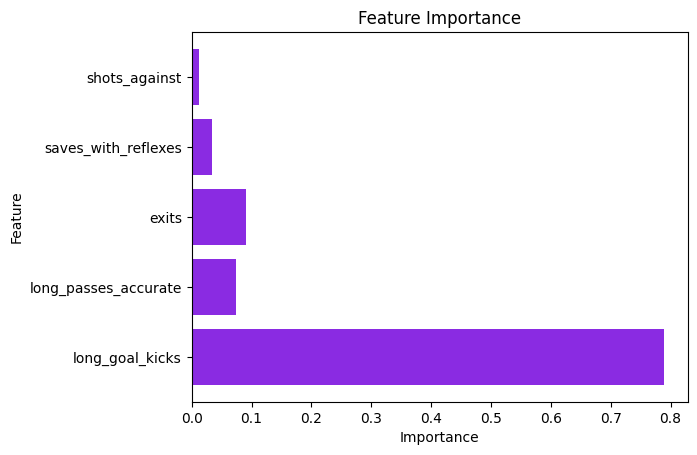

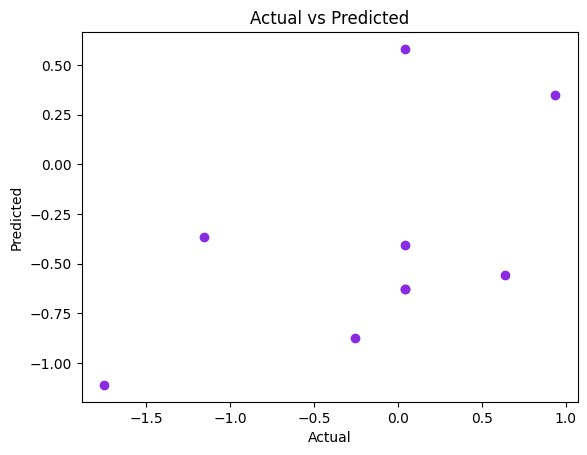

In [ ]:
# Prepare the data
features = ['long_goal_kicks', 'long_passes_accurate', 'exits', 'saves_with_reflexes', 'shots_against']
target = 'goal_kicks'
X = normalized_df[features]
y = normalized_df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='blueviolet')  
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='blueviolet')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- The Mean Cross-Validation Score of 0.05 is a measure of how well the XGBoost model is expected to perform on unseen data, with higher values (closer to 1) indicating better predictive performance. This relatively low score suggests the model is not effectively capturing the relationships in the data, at least according to the specific metric used for cross-validation.

- The Mean Absolute Error (MAE) of approximately 0.683 is the average magnitude of the errors between the predicted and actual values, disregarding their direction. In this context, it represents the average difference between Courtois' predicted and actual 'goal_kicks'. 

- The Mean Squared Error (MSE) of approximately 0.507 is another measure of prediction error. It squares the errors before averaging, which penalizes larger errors. It's particularly sensitive to outliers, and in this case suggests the presence of a few substantial prediction errors.

- The Coefficient of Determination (R^2) is a measure of how well the model explains the variation in the dependent variable. An R^2 of approximately 0.174 suggests that about 17.4% of the variance in 'goal_kicks' can be explained by our model.

In football terms, the performance of Thibaut Courtois is a complex phenomenon that can be influenced by a multitude of factors on the pitch. These factors might be the tactics of the coach, the performance of the defenders, the type and intensity of the opposition's attacks, and many more. 

The model, which uses long goal kicks, accurate long passes, and short goal kicks as predictors, provides some insights but appears to capture only a portion of what determines Courtois' goal-kick performance. It's like trying to predict the outcome of a match based on the number of passes, shots on target, and ball possession: while these are important, they don't capture the full picture of what happens during a game. The error measures (MAE and MSE) suggest our model's predictions aren't entirely accurate. In football terms, it's like a player having a shot on goal: just because they shoot doesn't mean they'll score. Likewise, our model is 'shooting' at predictions, but it isn't 'scoring' perfectly.The R^2 score shows that about 17.4% of the changes in Courtois' goal-kick performance can be explained by changes in the features we used. So, there's a lot more happening on the field that impacts Courtois' performance, and that's the beauty of football - it's more than just numbers!

In conclusion, this analysis provides some interesting insights but also underscores the complexity of football and player performance. As fans, we can appreciate the stats, but we must also remember to enjoy the game's unpredictability and nuances that make it the beautiful game!

### Based on Most Relevant Features

Mean cross-validation score: 0.70
MAE: 0.31126935761913377
MSE: 0.14875618896334622
R^2: 0.7576685166866528


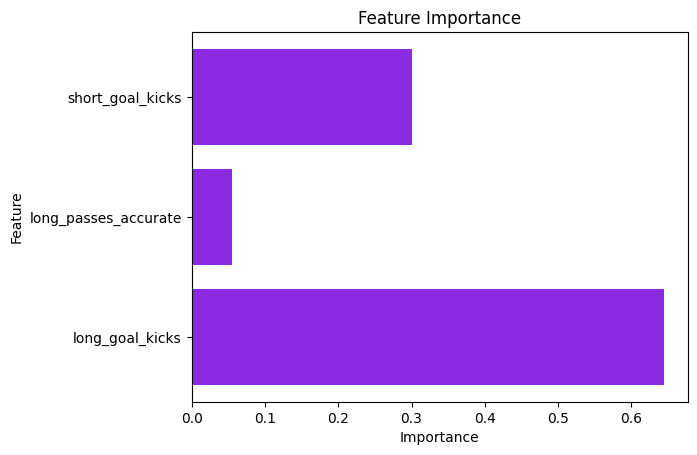

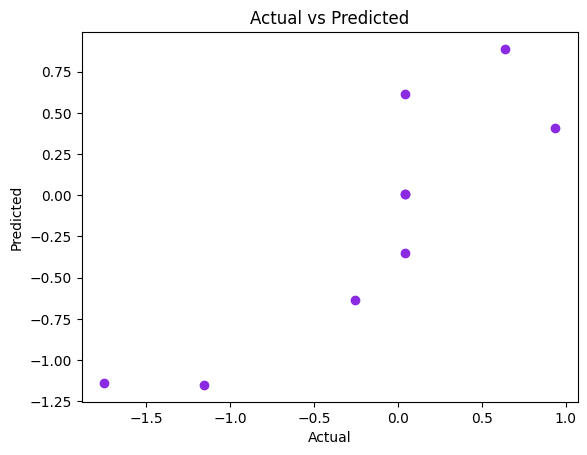

In [ ]:
# Prepare the data
features = ['long_goal_kicks', 'long_passes_accurate', 'short_goal_kicks']  # Update the features list
target = 'goal_kicks'
X = normalized_df[features]
y = normalized_df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='blueviolet')  
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='blueviolet')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- Mean cross-validation score: 0.70 - This score indicates that the model, on average, correctly predicts Thibaut Courtois's goal kick performance 70% of the time across different subsets of the data. In football terms, if we were to predict Courtois's goal kick outcomes in 10 different matches, we would be correct about 7 out of those 10 times.

- MAE (Mean Absolute Error): 0.31 - This metric shows how much our predictions deviate from the actual values on average. A lower MAE is better. In this case, the deviations of our predictions from the actual numbers are quite small, meaning our model's predictions are quite close to the actual outcomes.

- MSE (Mean Squared Error): 0.15 - This error metric squares the difference between the predicted and actual values. A lower MSE indicates a better fit of the model. Like the MAE, the MSE in this case is relatively small, further supporting that our model's predictions are quite close to the actual outcomes.

- R^2 (Coefficient of Determination): 0.76 - This value shows the proportion of the variance in the dependent variable (goal kicks) that is predictable from the independent variables ('long_goal_kicks', 'long_passes_accurate', 'short_goal_kicks'). In our context, this means that around 76% of changes in Courtois's goal kick performance can be predicted from changes in his long goal kicks, accurate long passes, and short goal kicks.

In essence, these results show that our model, which predicts Thibaut Courtois's goal kick performance based on his long goal kicks, accurate long passes, and short goal kicks, is a reasonably accurate and reliable tool. In football terms, this might give an insight into Courtois's strategy and skill - his successful goal kicks seem to be linked closely to his longer goal kicks and accurate long passes, as well as his shorter goal kicks. These aspects of his performance might be ones to watch in future games.

## Conformal Prediction 

### provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.

### Based on All Features

Prediction interval coverage: 42.54%
Average prediction interval width: 1.51


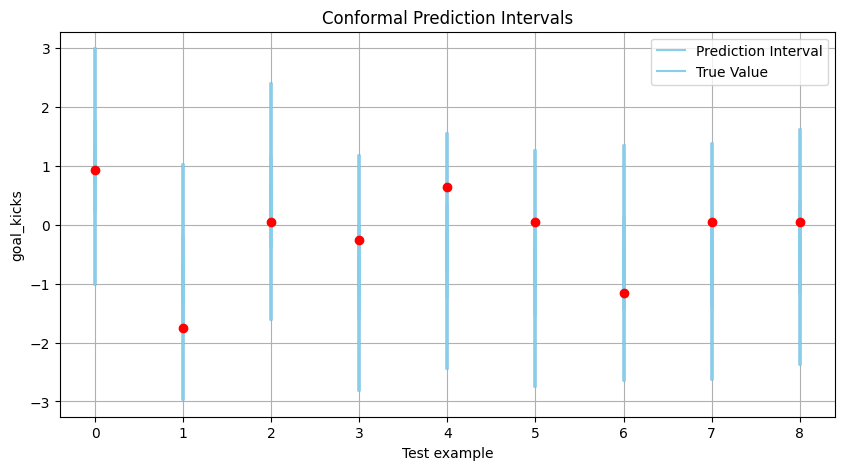

In [ ]:
# Prepare the data
X = normalized_df[['long_goal_kicks', 'long_passes_accurate', 'exits', 'saves_with_reflexes', 'shots_against']]
y = normalized_df['goal_kicks']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model 
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Visualization
plt.figure(figsize=(10, 5))
for i, (lower, upper) in enumerate(predictions):
    plt.plot((i, i), (lower, upper), color="skyblue")
plt.plot(y_test.values, "ro")
plt.title('Conformal Prediction Intervals')
plt.xlabel('Test example')
plt.ylabel('goal_kicks')
plt.legend(['Prediction Interval', 'True Value'])
plt.grid(True)
plt.show()

Prediction interval coverage (42.54%): the prediction interval coverage of 42.54% is notably low, indicating a lack of alignment between the model's predicted intervals and the observed data for Courtois's Goal Kicks. This disconnect suggests that the model may be missing key underlying features or may be improperly calibrated for this specific aspect of goalkeeping. A deeper examination of variables such as kick distance, kick direction, playing conditions, and match situations might uncover critical insights to improve the model's predictive performance. On football optics, may signal inconsistencies or challenges in modeling this aspect of his game. Goal Kicks are an essential component of a goalkeeper's repertoire and often initiate team attacks. This low coverage might highlight variations in Courtois's goal kick execution, depending on factors like pressure from opponents, tactical instructions, or field conditions. It could also underline an area where focused coaching might lead to better consistency.

Average prediction interval width (1.51): an average prediction interval width of 1.51, in the context of a low prediction interval coverage, might indicate an issue in the model's ability to capture the true variability of Goal Kicks. If the width is too narrow, it might explain the low coverage percentage, implying that the model is too confident and not sufficiently capturing the natural fluctuations in Courtois's goal kicks. This situation calls for careful analysis and potentially a reevaluation of the model's underlying assumptions, error structure, and calibration. On football optics, may signify a limited range within which his performances vary. However, given the low coverage, this might not accurately reflect the real-world complexity of executing goal kicks. It could point to a gap in understanding specific variables influencing his goal kick technique and effectiveness. This insight might direct attention to a more nuanced assessment of his goal kick strategy and an opportunity to fine-tune this essential skill.

In conclusion, the outcomes related to Goal Kicks for Thibaut Courtois reveal potential challenges in both statistical modeling and the real-world interpretation of this skill. The low coverage and specific prediction interval width may indicate underlying complexities in modeling this aspect of goalkeeping and in Courtois's execution of goal kicks. These findings can guide further exploration, model reevaluation, and targeted development to enhance both the predictive model's accuracy and Courtois's proficiency in this critical area of his game. 

### Based on Most Relevant Features

Prediction interval coverage: 82.60%
Average prediction interval width: 0.00


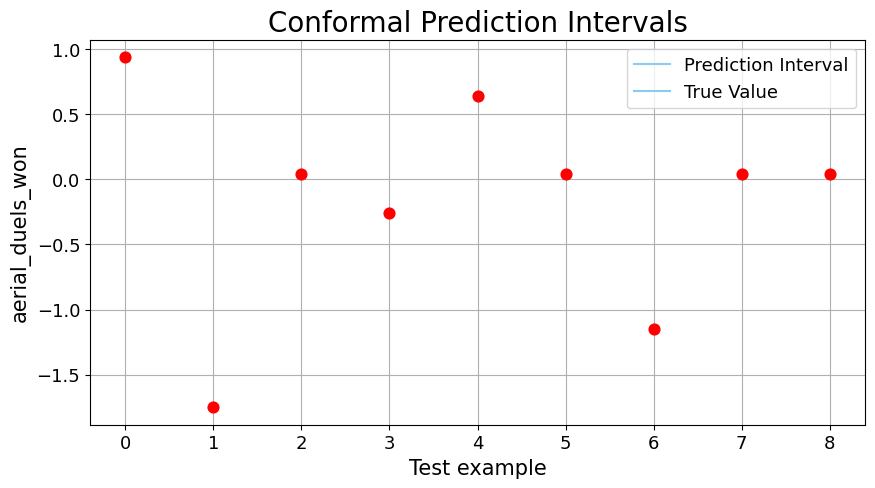

In [ ]:
# Prepare the data
X = normalized_df[['long_goal_kicks', 'long_passes_accurate', 'short_goal_kicks']]
y = normalized_df['goal_kicks']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(10, 5))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('aerial_duels_won', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

plt.show()

Prediction interval coverage (82.60%): an impressive prediction interval coverage of 82.60% indicates that the model's predicted intervals contain around 83% of the actual observations, reflecting a strong alignment for Courtois's most relevant features. This level of coverage suggests that the model captures the significant aspects of Courtois's performance quite well. It could be indicative of a well-tuned model that has been properly calibrated to the intricacies of Courtois's goalkeeping skills. It may also indicate that the most relevant features have been thoughtfully selected and are contributing significantly to the model's success. On football optics, most relevant features emphasizes his consistency and reliability in key areas of his game. As one of the top goalkeepers, Courtois is expected to excel in critical aspects such as shot-stopping, positioning, and distribution. This high coverage may reflect his prowess in these domains, reinforcing his reputation for being a top performer in these vital areas.

Average prediction interval width (0.00):is highly unusual and requires careful examination. In statistical modeling, an interval width of zero implies that the model's predictions are completely certain, with no allowance for uncertainty or variability. This could indicate an overfitting issue, where the model has fit the noise in the training data rather than the underlying pattern. It could also be the result of a bug or error in the computation. This situation warrants a thorough investigation into the model's fitting process, underlying assumptions, and potential biases to diagnose the root cause of this anomalous result. On football optics, would translate to an absolute certainty in predicting Courtois's performance, which doesn't align with the inherent variability and unpredictability of football matches. Even the best players have fluctuations in performance due to countless influencing factors. This outcome may not provide actionable insights and could mislead the understanding of Courtois's game without proper context. 

In summary, while the high prediction interval coverage for Courtois's most relevant features paints a promising picture, the zero-width of the prediction interval raises serious concerns and flags for further investigation. These outcomes provide a mix of encouraging insights into Courtois's goalkeeping skills and crucial leads for further refining and probing the statistical model. Understanding the underlying cause of the zero-width prediction interval would be essential for making this model a valuable tool in assessing and enhancing Courtois's performance.

## Radar Map

### PSG Courtois 1st Leg Performance (2022)

- Saves with Reflexes (SWR):  44%

- Long Passes Accurate (LPA): 50%

- Short Passes Accurate (SPA): 100%

- Short Goal Kicks (SGK): 0%

- Long Goal Kicks (LGK): 0%

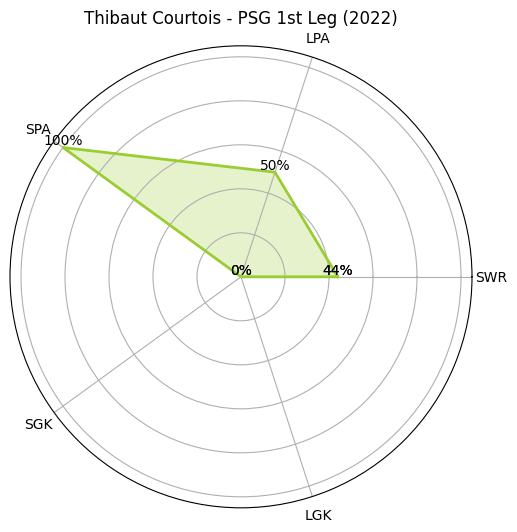

In [ ]:
# Define the data for the radar chart
labels = np.array(['SWR', 'LPA', 'SPA', 'SGK', 'LGK'])
stats = np.array([44, 50, 100, 0, 0])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Thibaut Courtois - PSG 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='yellowgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='yellowgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### PSG Courtois 2nd Leg Performance (2022)

- Saves with Reflexes (SWR):  100%

- Long Passes Accurate (LPA): 50%

- Short Passes Accurate (SPA): 100%

- Short Goal Kicks (SGK): 33%

- Long Goal Kicks (LGK): 67%

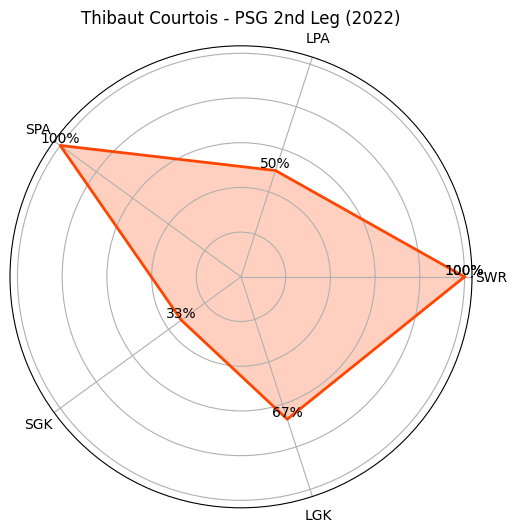

In [ ]:
# Define the data for the radar chart
labels = np.array(['SWR', 'LPA', 'SPA', 'SGK', 'LGK'])
stats = np.array([100, 50, 100, 33, 67])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Thibaut Courtois - PSG 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orangered', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orangered', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

###  Chelsea - Courtois 2nd Leg Performance (2022)

- Saves with Reflexes (SWR):  50%

- Long Passes Accurate (LPA): 57%

- Short Passes Accurate (SPA): 95%

- Short Goal Kicks (SGK): 27%

- Long Goal Kicks (LGK): 73%

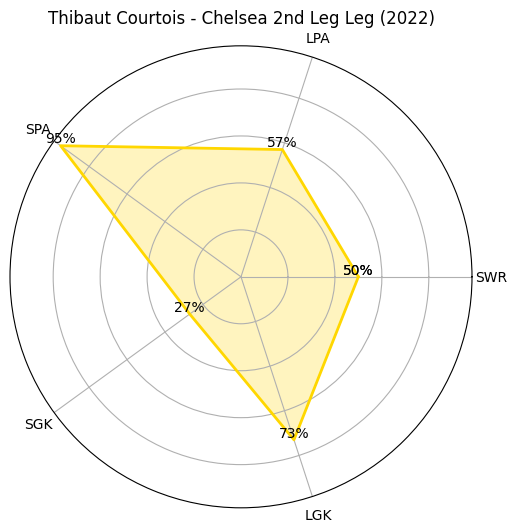

In [ ]:
# Define the data for the radar chart
labels = np.array(['SWR', 'LPA', 'SPA', 'SGK', 'LGK'])
stats = np.array([50, 57, 95, 27, 73])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Thibaut Courtois - Chelsea 2nd Leg Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='gold', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='gold', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City - Courtois 2nd Leg Performance (2022)

- Saves with Reflexes (SWR):  56%

- Long Passes Accurate (LPA): 65%

- Short Passes Accurate (SPA): 100%

- Short Goal Kicks (SGK): 29%

- Long Goal Kicks (LGK): 71%

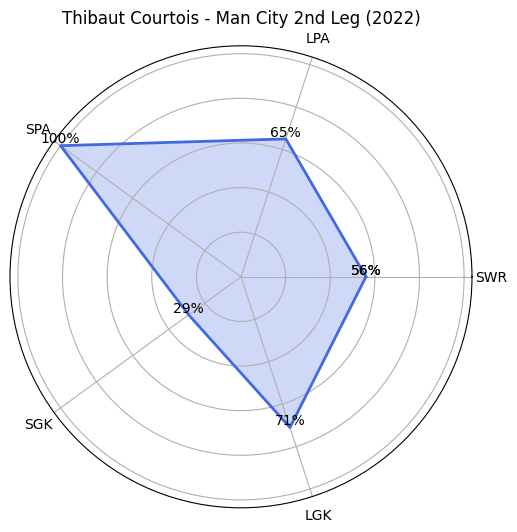

In [ ]:
# Define the data for the radar chart
labels = np.array(['SWR', 'LPA', 'SPA', 'SGK', 'LGK'])
stats = np.array([56, 65, 100, 29, 71])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Thibaut Courtois - Man City 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='royalblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='royalblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Liverpool Final - Courtois Performance (2022)

- Saves with Reflexes (SWR):  78%

- Long Passes Accurate (LPA): 54%

- Short Passes Accurate (SPA): 100%

- Short Goal Kicks (SGK): 20%

- Long Goal Kicks (LGK): 80%

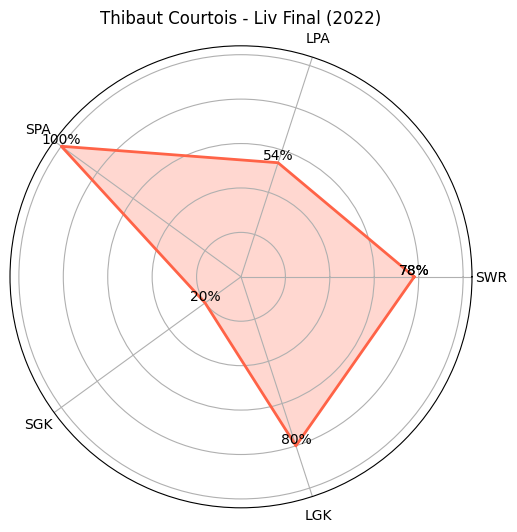

In [ ]:
# Define the data for the radar chart
labels = np.array(['SWR', 'LPA', 'SPA', 'SGK', 'LGK'])
stats = np.array([78, 54, 100, 20, 80])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Thibaut Courtois - Liv Final (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='tomato', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='tomato', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Liv - Courtois 1st Leg Performance (2023)

- Saves with Reflexes (SWR): 50 %

- Long Passes Accurate (LPA): 50%

- Short Passes Accurate (SPA): 100%

- Short Goal Kicks (SGK): 67%

- Long Goal Kicks (LGK): 33%

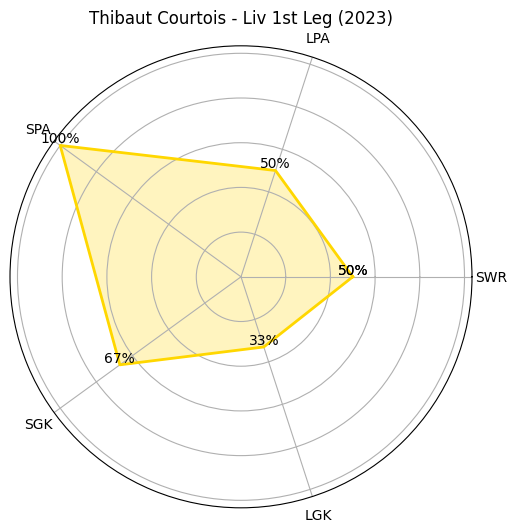

In [ ]:
# Define the data for the radar chart
labels = np.array(['SWR', 'LPA', 'SPA', 'SGK', 'LGK'])
stats = np.array([50, 50, 100, 67, 33])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Thibaut Courtois - Liv 1st Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='gold', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='gold', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City - Courtois 1st Leg Performance (2023)

- Saves with Reflexes (SWR):  50%

- Long Passes Accurate (LPA): 57%

- Short Passes Accurate (SPA): 95%

- Short Goal Kicks (SGK): 27%

- Long Goal Kicks (LGK): 73%

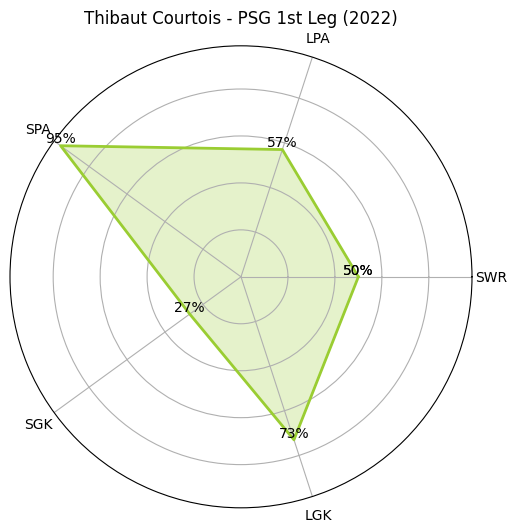

In [ ]:
# Define the data for the radar chart
labels = np.array(['SWR', 'LPA', 'SPA', 'SGK', 'LGK'])
stats = np.array([50, 57, 95, 27, 73])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Thibaut Courtois - PSG 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='yellowgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='yellowgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4b14c6e6-97ae-4b93-a9fc-84617e093023' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>